# **1. Data Mounting**
### Configuring the connection between the data and the program.

## a. Mounting Google Drive and Loading Files

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from google.colab import drive
import os


# Mount Google Drive
drive.mount('/content/drive')

# Set the path to dataset folder in Google Drive
data_folder = "/content/drive/My Drive/ELEC3612 Crypto Project/Fintech Data/"  # Adjust the path as needed

# Load all CSV files from the folder
file_paths = glob.glob(data_folder + "*.csv")

Mounted at /content/drive


# **2. Initial Data Visualization**
### Plotting all cryptocurrencies by Price, Volume, and Market Cap.

## a. Plotting All Cryptocurrencies by Price

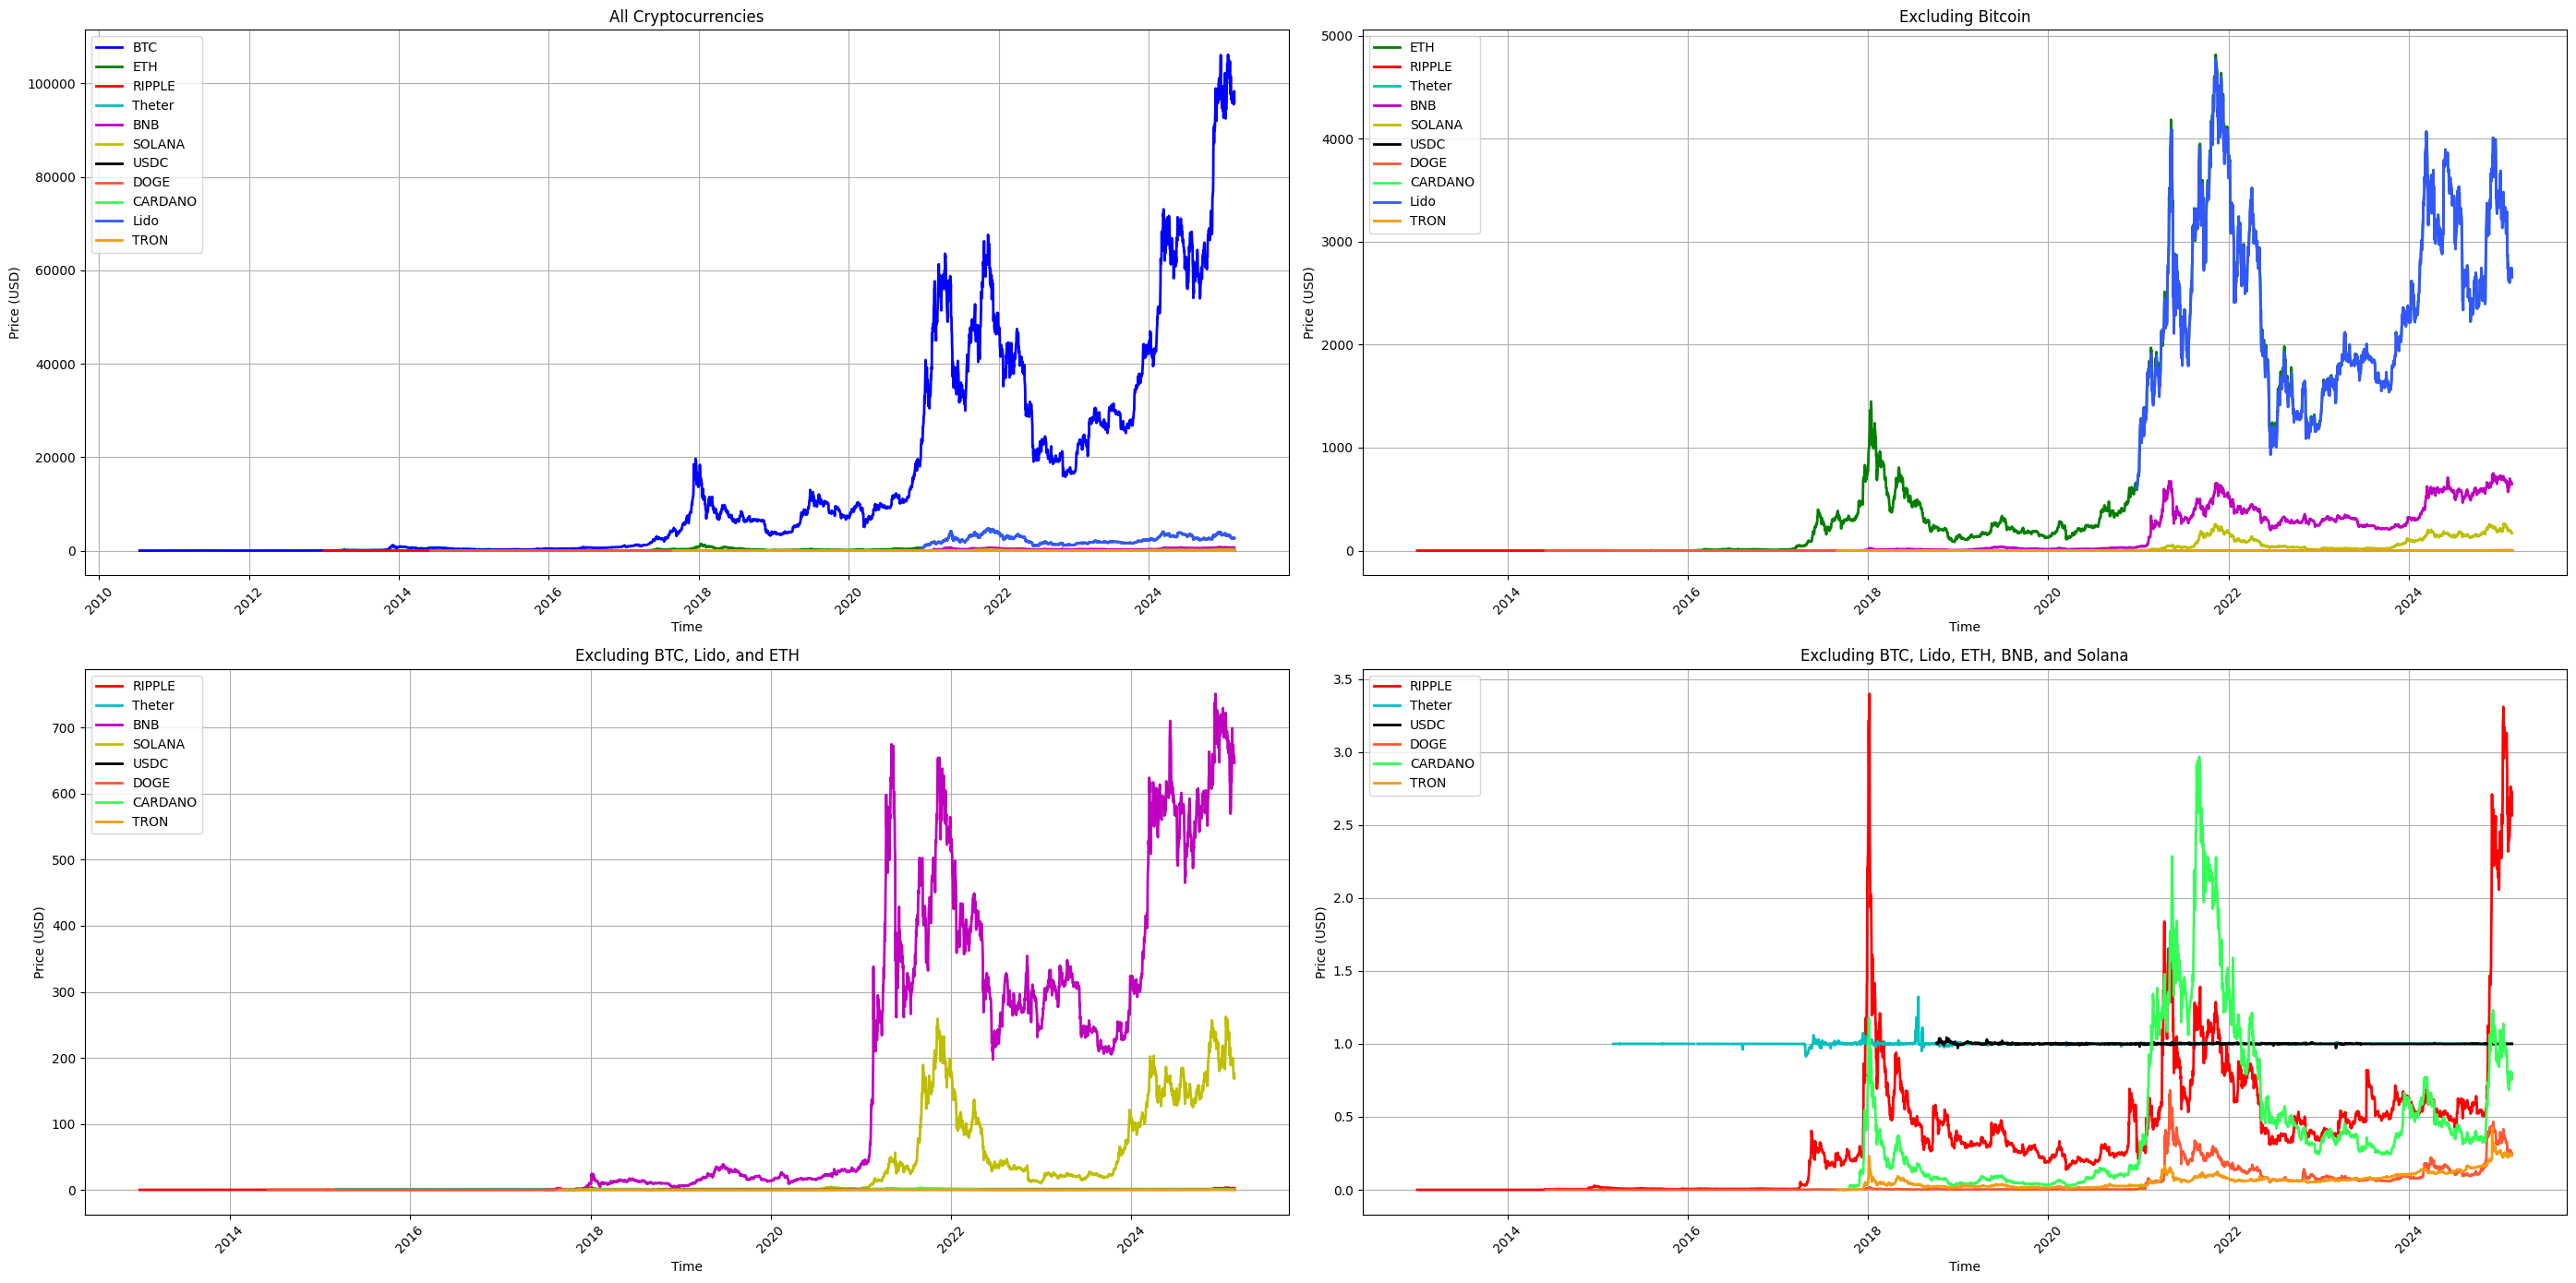

In [ ]:
# Function to clean and plot cryptocurrency data on a given Axes
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Price Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)
        df['Date'] = df['Date'].str.replace(r' UTC\+\d+', '', regex=True)
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Price'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Price (USD)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Plot configurations (first four only)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"},
    {"exclude": ["BTC"], "title": "Excluding Bitcoin"},
    {"exclude": ["BTC", "Lido", "ETH"], "title": "Excluding BTC, Lido, and ETH"},
    {"exclude": ["BTC", "Lido", "ETH", "BNB", "SOLANA"], "title": "Excluding BTC, Lido, ETH, BNB, and Solana"},
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
axes = axes.flatten()

# Generate the selected plots
for idx, config in enumerate(plot_configs):
    plot_cryptos(axes[idx], file_paths, exclude=config["exclude"], title=config["title"])

plt.tight_layout()
plt.show()

## b. Plotting All Cryptocurrencies by Volume

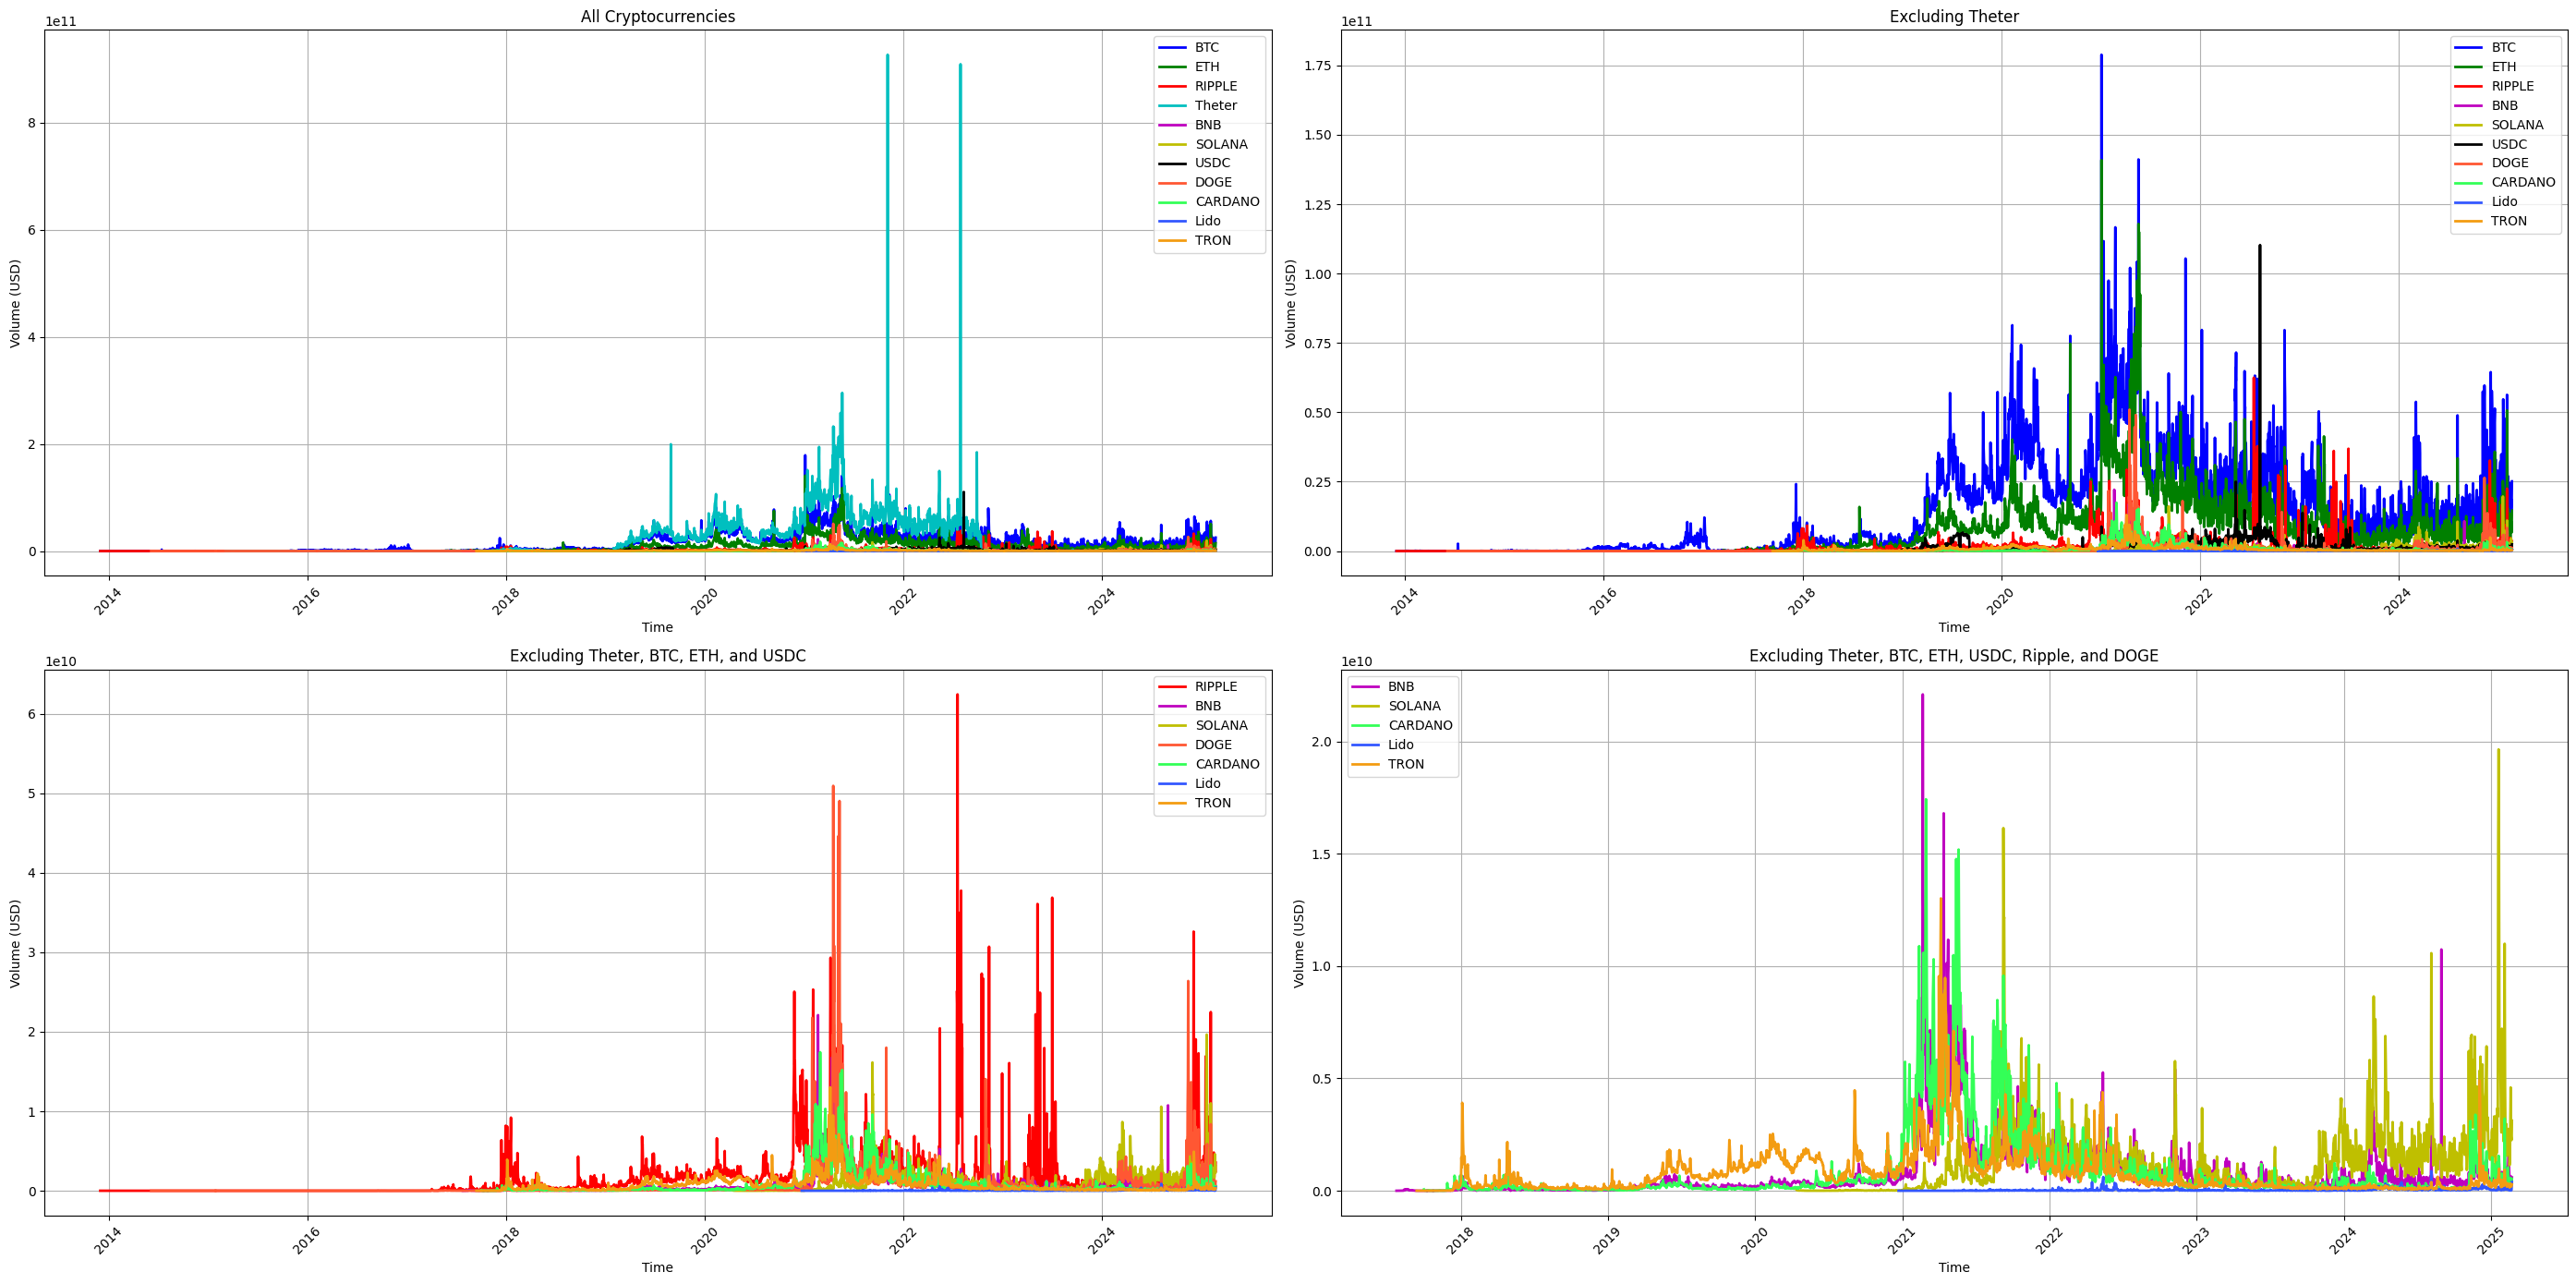

In [ ]:
# Function to clean and plot cryptocurrency volume data on a given Axes
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Volume Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)
        df['Date'] = df['Date'].str.replace(r' UTC\+\d+', '', regex=True)
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Volume'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Volume (USD)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Plot configurations (first four only)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"},
    {"exclude": ["Theter"], "title": "Excluding Theter"},
    {"exclude": ["Theter", "BTC", "ETH", "USDC"], "title": "Excluding Theter, BTC, ETH, and USDC"},
    {"exclude": ["Theter", "BTC", "ETH", "USDC", "RIPPLE", "DOGE"], "title": "Excluding Theter, BTC, ETH, USDC, Ripple, and DOGE"},
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
axes = axes.flatten()

# Generate the selected plots
for idx, config in enumerate(plot_configs):
    plot_cryptos(axes[idx], file_paths, exclude=config["exclude"], title=config["title"])

plt.tight_layout()
plt.show()

## c. Plotting All Cryptocurrencies by Market Cap

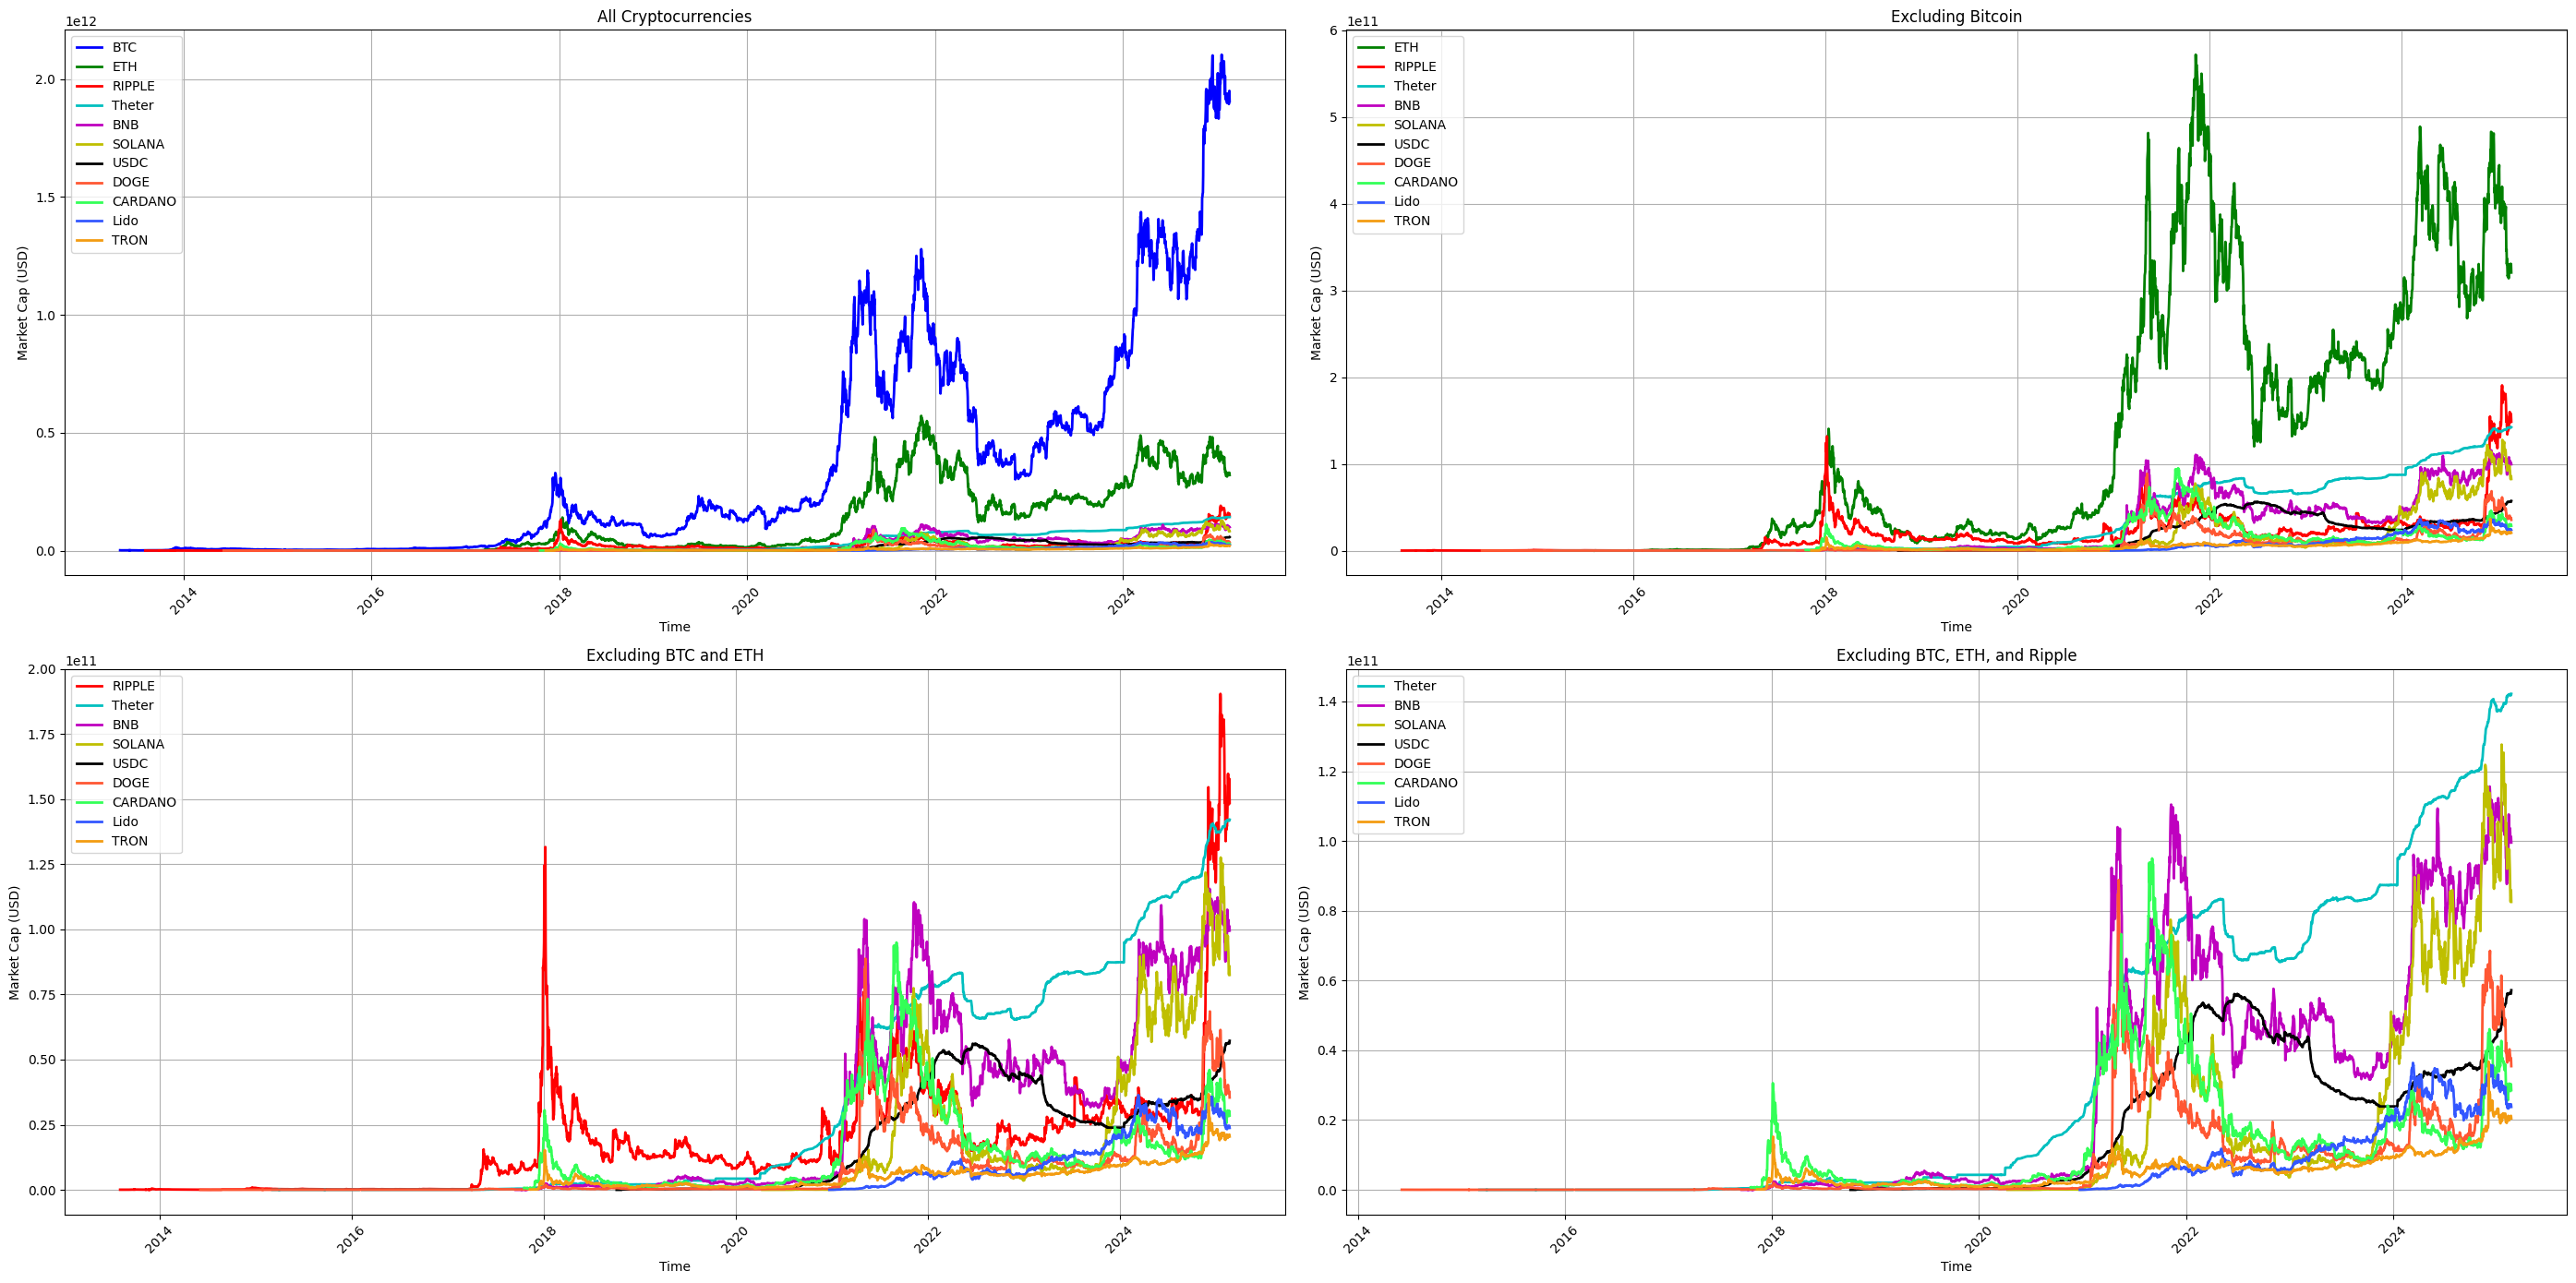

In [ ]:
# Function to clean and plot cryptocurrency market cap data on a given Axes
def plot_cryptos_market_cap(ax, file_paths, exclude=None, title="Cryptocurrency Market Cap Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)
        df['Date'] = df['Date'].str.replace(r' UTC\+\d+', '', regex=True)
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Market_cap'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Market Cap (USD)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Plot configurations (first four only)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"},
    {"exclude": ["BTC"], "title": "Excluding Bitcoin"},
    {"exclude": ["BTC", "ETH"], "title": "Excluding BTC and ETH"},
    {"exclude": ["BTC", "ETH", "RIPPLE"], "title": "Excluding BTC, ETH, and Ripple"},
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
axes = axes.flatten()

# Generate the selected plots
for idx, config in enumerate(plot_configs):
    plot_cryptos_market_cap(axes[idx], file_paths, exclude=config["exclude"], title=config["title"])

plt.tight_layout()
plt.show()

# **3. Data Transforming & Cleaning**
### Inspecting, transforming and cleaning the dataset to ensure high quality results and optimal formatting.

## a. Checking Missing & Duplicate Values

In [ ]:
# Check missing values and duplicates in each file
for file in file_paths:
    df = pd.read_csv(file)

    # Extract the cryptocurrency name from the filename
    crypto_name = file.split("/")[-1]

    # Get missing values per column
    missing_values = df.isnull().sum()

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()

    # Format output for missing values as a single line
    missing_values_str = ", ".join([f"{col} ({missing_values[col]})" for col in df.columns])

    # Print the results
    print(f"Missing values in {crypto_name}: {missing_values_str}")
    print(f"Duplicate rows in {crypto_name}: {duplicate_rows}")

Missing values in BTC.csv: Date (0), Price (1), Volume (1232), Market_cap (1018)
Duplicate rows in BTC.csv: 0
Missing values in ETH.csv: Date (0), Price (1), Volume (1), Market_cap (2)
Duplicate rows in ETH.csv: 0
Missing values in RIPPLE.csv: Date (0), Price (0), Volume (333), Market_cap (220)
Duplicate rows in RIPPLE.csv: 0
Missing values in Theter.csv: Date (0), Price (23), Volume (23), Market_cap (23)
Duplicate rows in Theter.csv: 0
Missing values in BNB.csv: Date (0), Price (2), Volume (22), Market_cap (75)
Duplicate rows in BNB.csv: 0
Missing values in SOLANA.csv: Date (0), Price (0), Volume (0), Market_cap (0)
Duplicate rows in SOLANA.csv: 0
Missing values in USDC.csv: Date (0), Price (0), Volume (0), Market_cap (0)
Duplicate rows in USDC.csv: 0
Missing values in DOGE.csv: Date (0), Price (1), Volume (1), Market_cap (2)
Duplicate rows in DOGE.csv: 0
Missing values in CARDANO.csv: Date (0), Price (0), Volume (8), Market_cap (25)
Duplicate rows in CARDANO.csv: 0
Missing values in 

## b. Transforming & Cleaning Data

In [ ]:
# Transform, clean, normalize, and save each file
from sklearn.preprocessing import MinMaxScaler

save_folder = "/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/"

# Create the folder if it doesn't exist
os.makedirs(save_folder, exist_ok=True)

for file in file_paths:
    df = pd.read_csv(file)

    # Extract the cryptocurrency name from the filename
    crypto_name = file.split("/")[-1]

    # Convert 'Date' to datetime
    df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')

    # Ensure numeric columns are correctly typed
    numeric_cols = ['Price', 'Volume', 'Market_cap']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with any missing or invalid data
    df.dropna(inplace=True)

    # Sort by Date
    df = df.sort_values('Date').reset_index(drop=True)

    # Set 'Date' as index
    df.set_index('Date', inplace=True)

    scaler = MinMaxScaler()

    # Fit and transform only the numeric columns
    normalized_values = scaler.fit_transform(df[numeric_cols])

    # Create new columns for normalized data
    df['Price_normalized'] = normalized_values[:, 0]
    df['Volume_normalized'] = normalized_values[:, 1]
    df['Market_cap_normalized'] = normalized_values[:, 2]

    # Save cleaned and transformed file
    save_path = os.path.join(save_folder, "Cleaned_" + crypto_name)
    df.to_csv(save_path)

    # Print confirmation
    print(f"Cleaned, normalized, and saved {crypto_name} to {save_path}")

Cleaned, normalized, and saved BTC.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_BTC.csv
Cleaned, normalized, and saved ETH.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_ETH.csv
Cleaned, normalized, and saved RIPPLE.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_RIPPLE.csv
Cleaned, normalized, and saved Theter.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_Theter.csv
Cleaned, normalized, and saved BNB.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_BNB.csv
Cleaned, normalized, and saved SOLANA.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_SOLANA.csv
Cleaned, normalized, and saved USDC.csv to /content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two/Cleaned_USDC.csv
Cleaned, normalized, and saved DOGE

## c. Re-Checking Missing & Duplicate Values

In [ ]:
# Get all cleaned file paths
cleaned_file_paths = glob.glob(save_folder + "*.csv")

for file in cleaned_file_paths:
    df = pd.read_csv(file)

    # Extract the cryptocurrency name from the filename
    crypto_name = file.split("/")[-1]

    # Get missing values per column
    missing_values = df.isnull().sum()

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()

    # Format output for missing values as a single line
    missing_values_str = ", ".join([f"{col} ({missing_values[col]})" for col in df.columns])

    # Print the results
    print(f"[CLEANED] Missing values in {crypto_name}: {missing_values_str}")
    print(f"[CLEANED] Duplicate rows in {crypto_name}: {duplicate_rows}")


[CLEANED] Missing values in crypto_risk_summary.csv: Crypto (0), VaR (95%) (0), CVaR (95%) (0), Sharpe Ratio (11), Max Drawdown (0)
[CLEANED] Duplicate rows in crypto_risk_summary.csv: 0
[CLEANED] Missing values in Cleaned_DOGE.csv: Date (0), Price (0), Volume (0), Market_cap (0), Price_normalized (0), Volume_normalized (0), Market_cap_normalized (0)
[CLEANED] Duplicate rows in Cleaned_DOGE.csv: 0
[CLEANED] Missing values in Cleaned_BNB.csv: Date (0), Price (0), Volume (0), Market_cap (0), Price_normalized (0), Volume_normalized (0), Market_cap_normalized (0)
[CLEANED] Duplicate rows in Cleaned_BNB.csv: 0
[CLEANED] Missing values in Cleaned_Lido.csv: Date (0), Price (0), Volume (0), Market_cap (0), Price_normalized (0), Volume_normalized (0), Market_cap_normalized (0)
[CLEANED] Duplicate rows in Cleaned_Lido.csv: 0
[CLEANED] Missing values in Cleaned_ETH.csv: Date (0), Price (0), Volume (0), Market_cap (0), Price_normalized (0), Volume_normalized (0), Market_cap_normalized (0)
[CLEANED

# **4. Cleaned & Normalized Data Visualization**
### Plotting all cryptocurrencies by cleaned and normalized Price, Volume, and Market Cap.

## a. Plotting All Cleaned Cryptocurrencies by Price

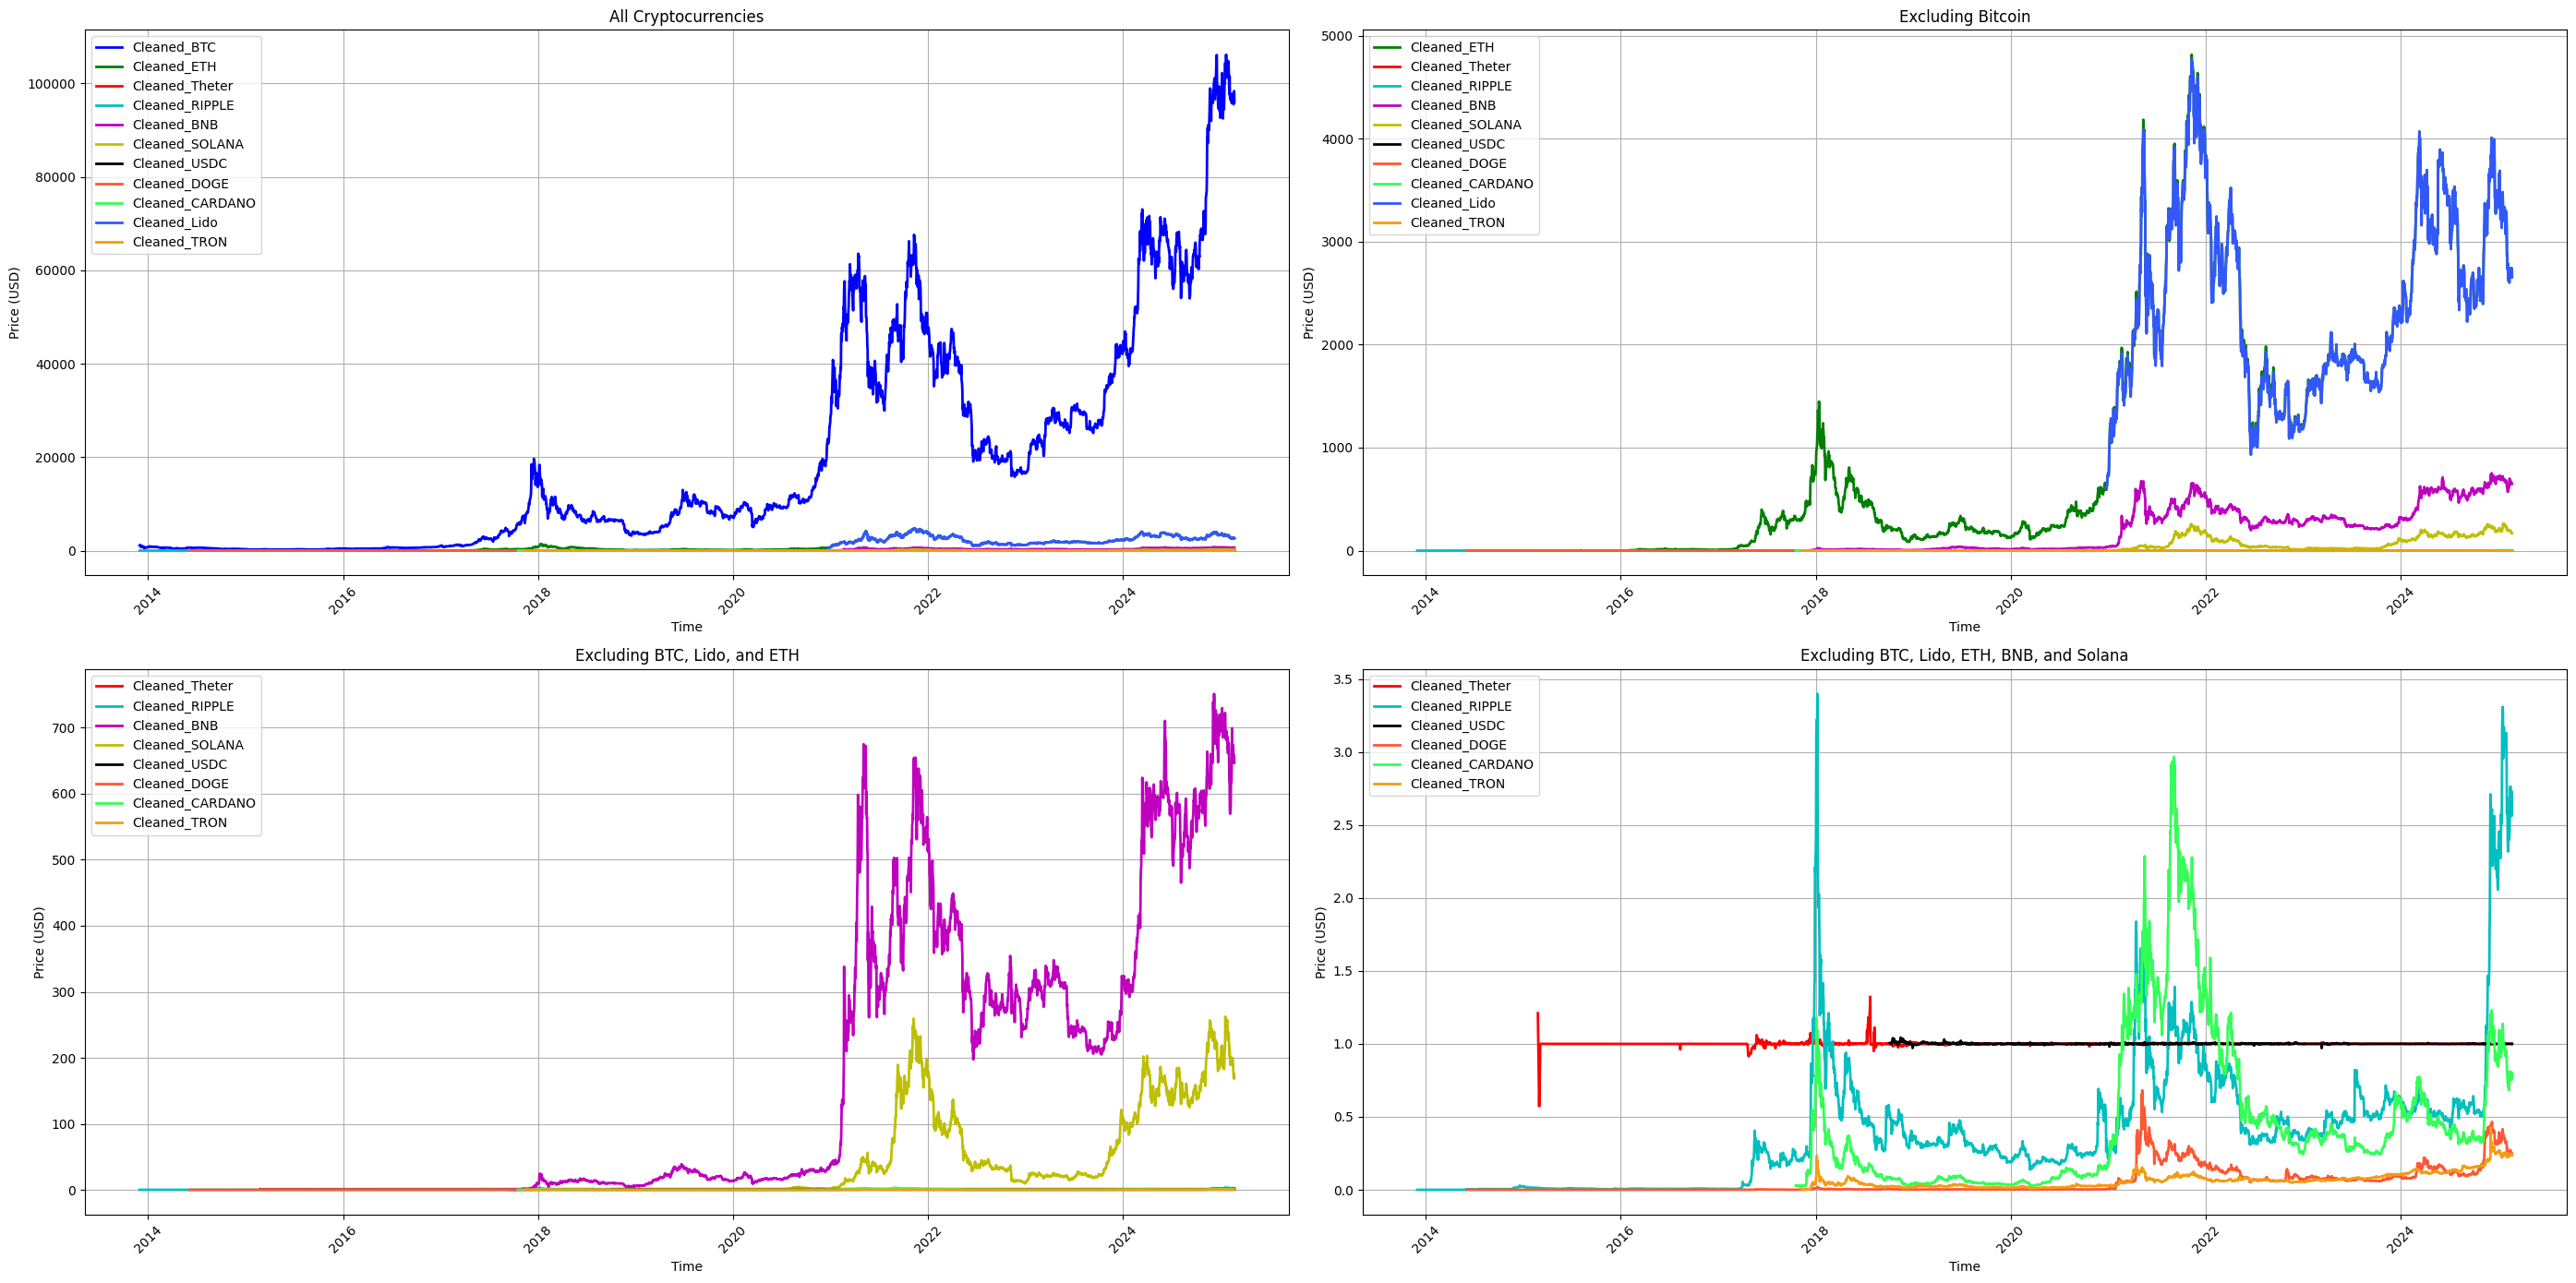

In [ ]:
# Function to plot cleaned cryptocurrency data
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Price Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        # The cleaned files already have 'Date' properly formatted and set as index
        df.reset_index(inplace=True)  # Move Date back to a column if it is index
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # Just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Price'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Price (USD)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

# Plot configurations (first four only)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"},
    {"exclude": ["BTC"], "title": "Excluding Bitcoin"},
    {"exclude": ["BTC", "Lido", "ETH"], "title": "Excluding BTC, Lido, and ETH"},
    {"exclude": ["BTC", "Lido", "ETH", "BNB", "SOLANA"], "title": "Excluding BTC, Lido, ETH, BNB, and Solana"},
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
axes = axes.flatten()

# Generate the selected plots
for idx, config in enumerate(plot_configs):
    plot_cryptos(axes[idx], cleaned_file_paths, exclude=config["exclude"], title=config["title"])

plt.tight_layout()
plt.show()

## b. Plotting All Cleaned Cryptocurrencies by Volume

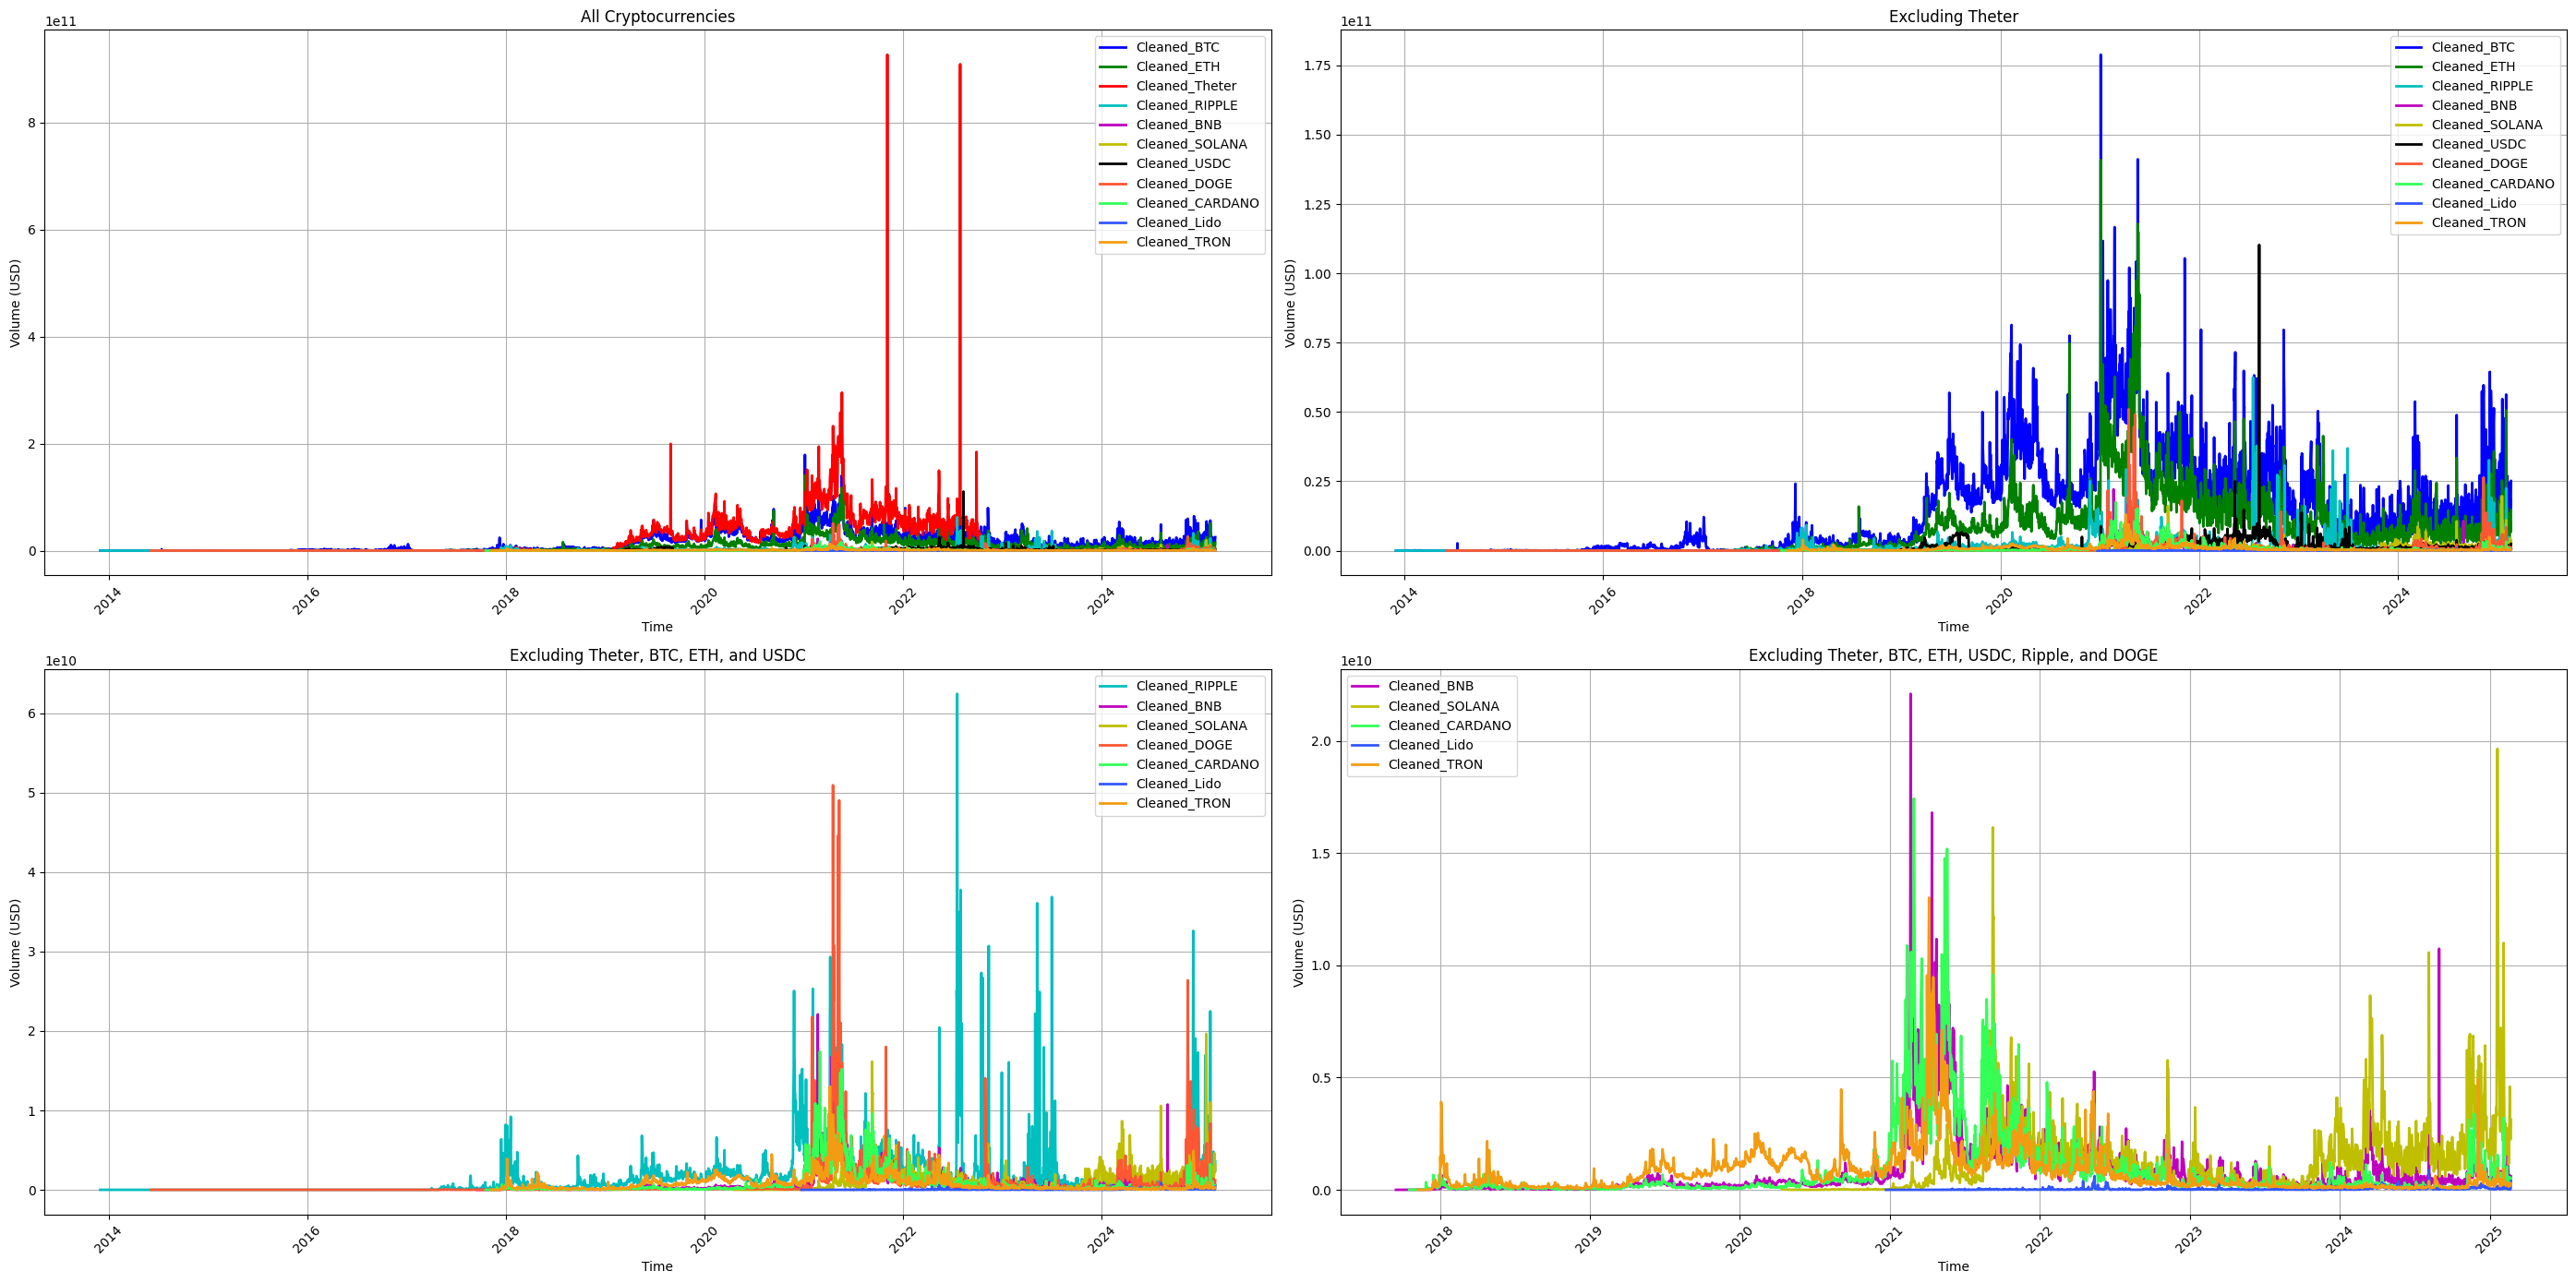

In [ ]:
# Function to plot cleaned cryptocurrency volume data
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Volume Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        # Reset index because Date was saved as index
        df.reset_index(inplace=True)
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Volume'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Volume (USD)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

# Plot configurations (first four only)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"},
    {"exclude": ["Theter"], "title": "Excluding Theter"},
    {"exclude": ["Theter", "BTC", "ETH", "USDC"], "title": "Excluding Theter, BTC, ETH, and USDC"},
    {"exclude": ["Theter", "BTC", "ETH", "USDC", "RIPPLE", "DOGE"], "title": "Excluding Theter, BTC, ETH, USDC, Ripple, and DOGE"},
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
axes = axes.flatten()

# Generate the selected plots
for idx, config in enumerate(plot_configs):
    plot_cryptos(axes[idx], cleaned_file_paths, exclude=config["exclude"], title=config["title"])

plt.tight_layout()
plt.show()

## c. Plotting All Cleaned Cryptocurrencies by Market Cap

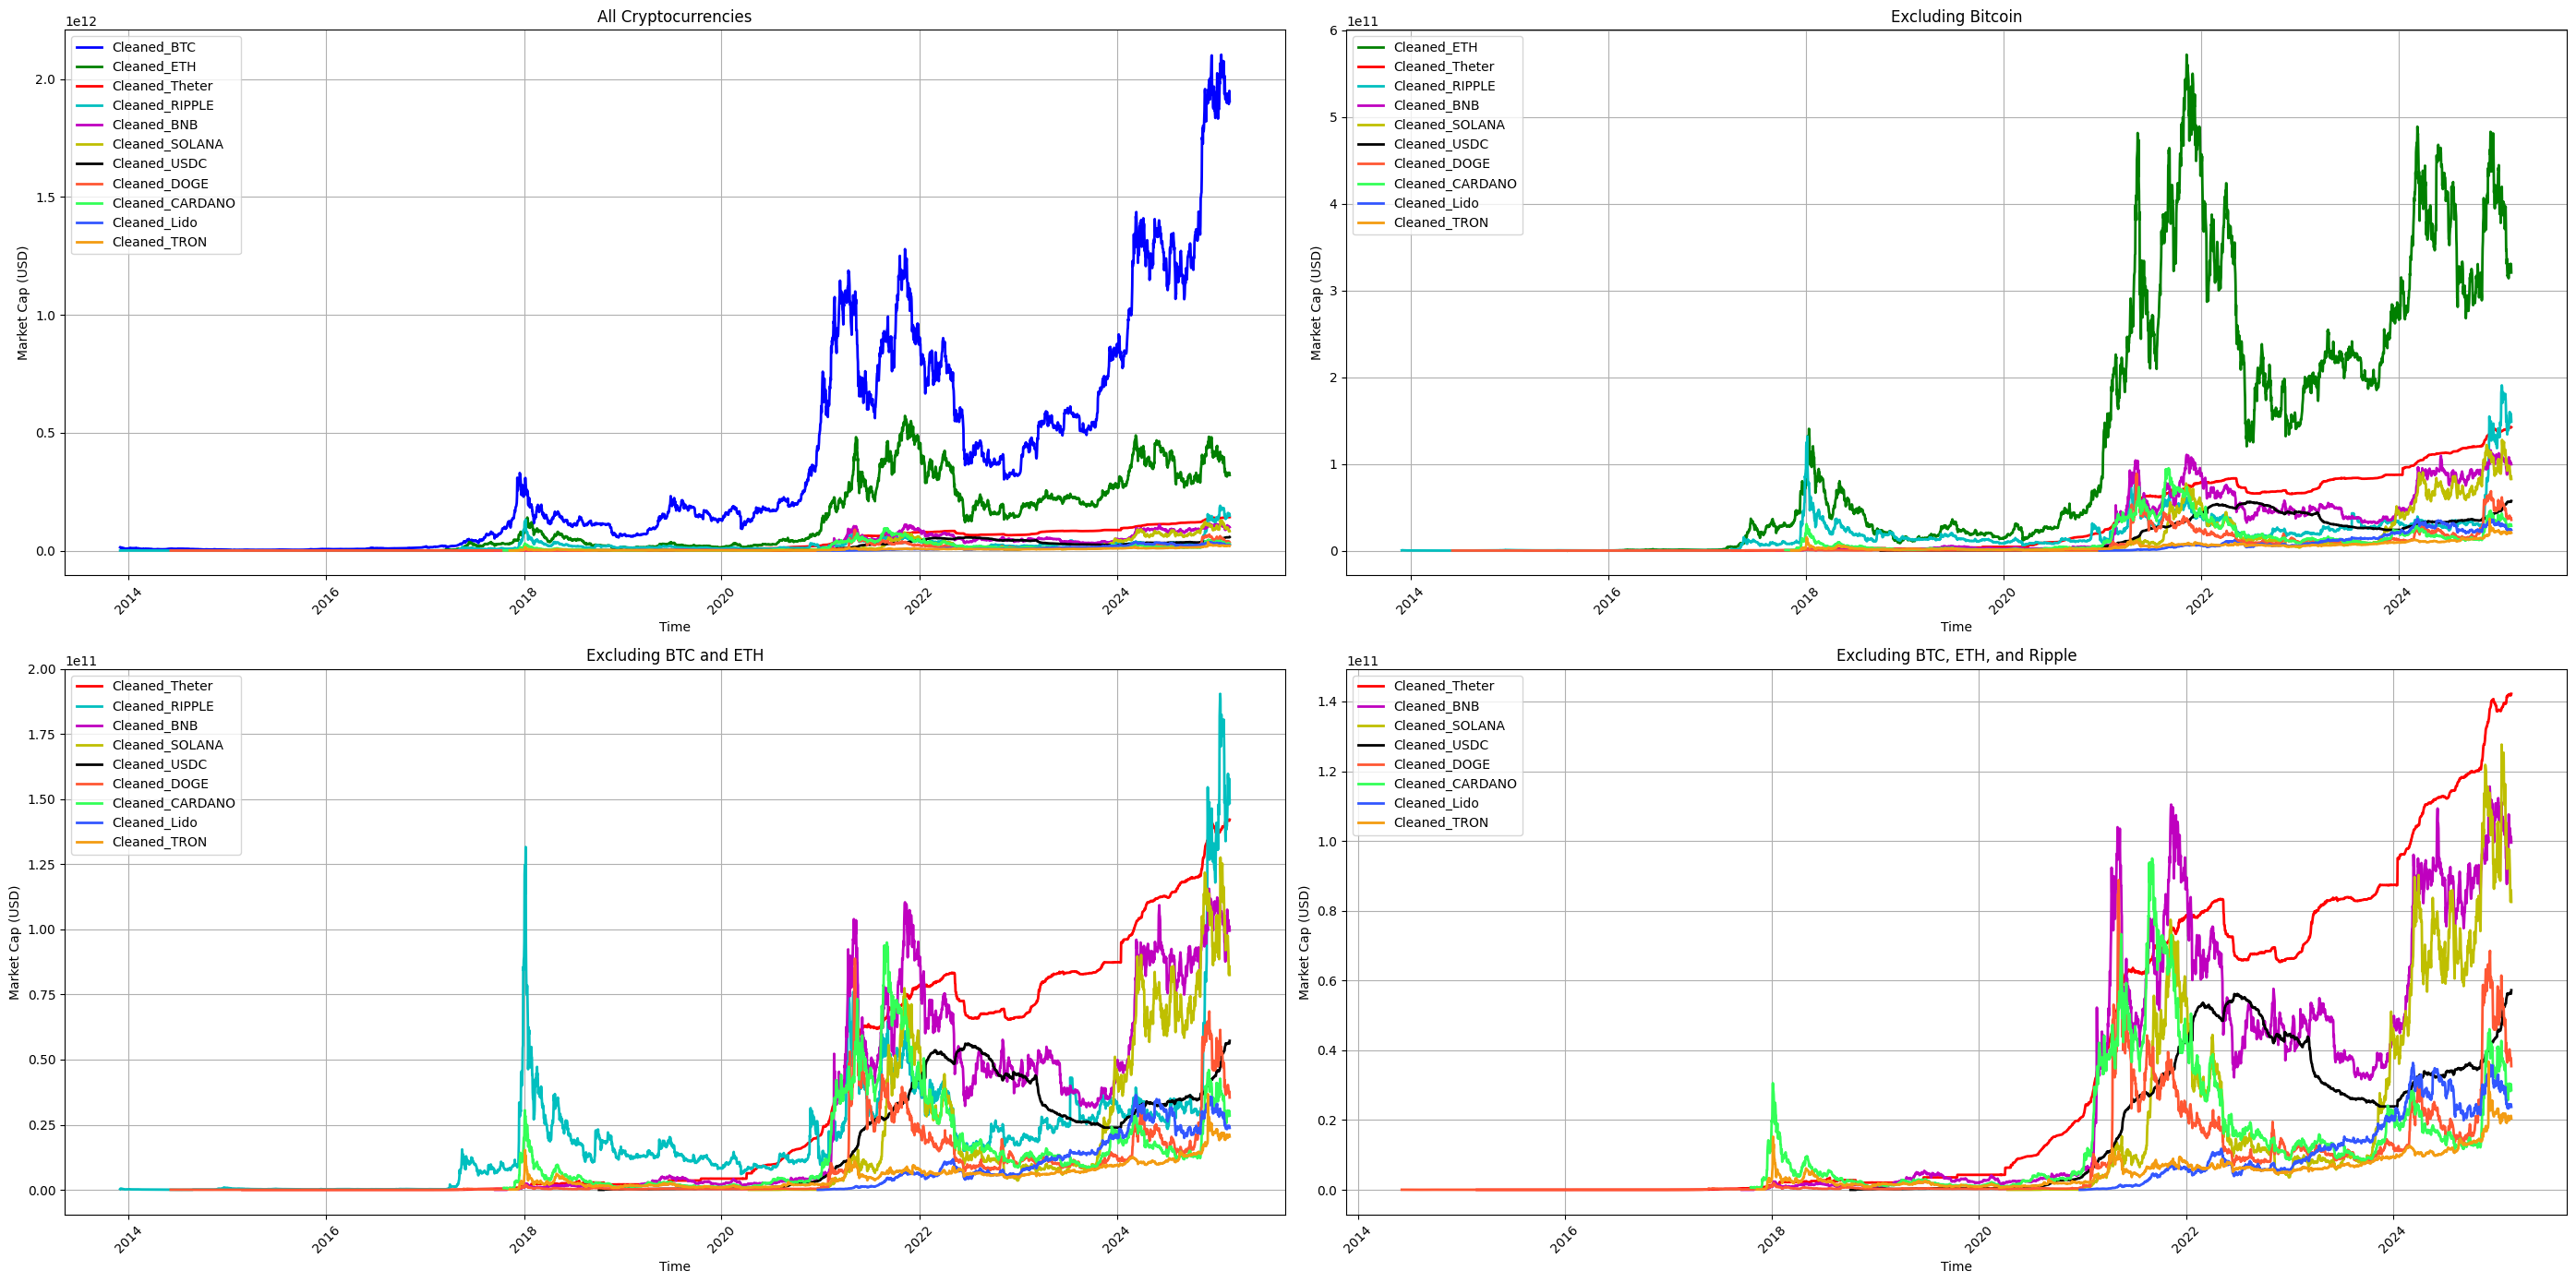

In [ ]:
# Function to plot cleaned cryptocurrency market cap data
def plot_cryptos_market_cap(ax, file_paths, exclude=None, title="Cryptocurrency Market Cap Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        # Reset index because Date was saved as index
        df.reset_index(inplace=True)
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Market_cap'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Market Cap (USD)")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

# Plot configurations (first four only)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"},
    {"exclude": ["BTC"], "title": "Excluding Bitcoin"},
    {"exclude": ["BTC", "ETH"], "title": "Excluding BTC and ETH"},
    {"exclude": ["BTC", "ETH", "RIPPLE"], "title": "Excluding BTC, ETH, and Ripple"},
]

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(28, 14))
axes = axes.flatten()

# Generate the selected plots
for idx, config in enumerate(plot_configs):
    plot_cryptos_market_cap(axes[idx], cleaned_file_paths, exclude=config["exclude"], title=config["title"])

plt.tight_layout()
plt.show()

## d. Plotting All Normalized Cryptocurrencies by Price

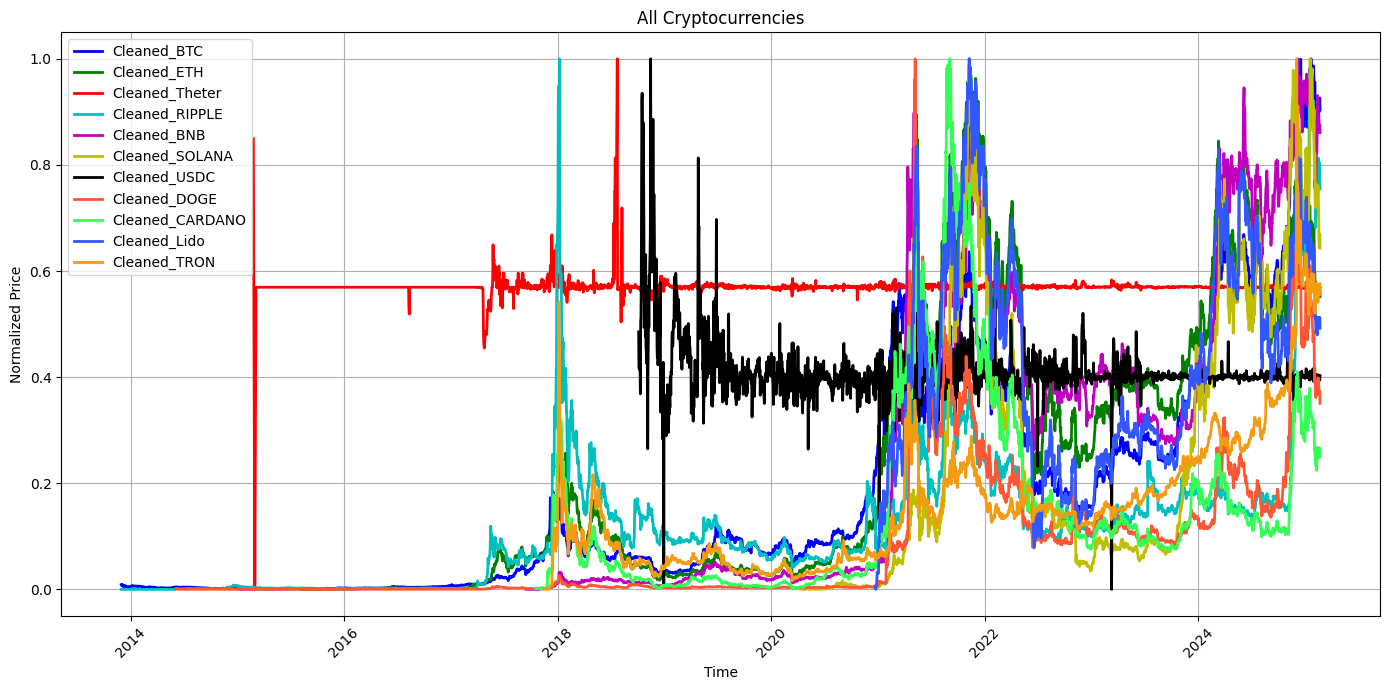

In [ ]:
# Function to plot cleaned cryptocurrency normalized price data
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Normalized Price Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        df.reset_index(inplace=True)  # Move Date back to a column if it is index
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # Just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Price_normalized'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized Price")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

# Only the first configuration (All Cryptocurrencies)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"}
]

# Create subplot layout
fig, ax = plt.subplots(figsize=(14, 7))

# Generate the selected plot (only first config)
plot_cryptos(ax, cleaned_file_paths, exclude=plot_configs[0]["exclude"], title=plot_configs[0]["title"])

plt.tight_layout()
plt.show()


## e. Plotting All Normalized Cryptocurrencies by Volume

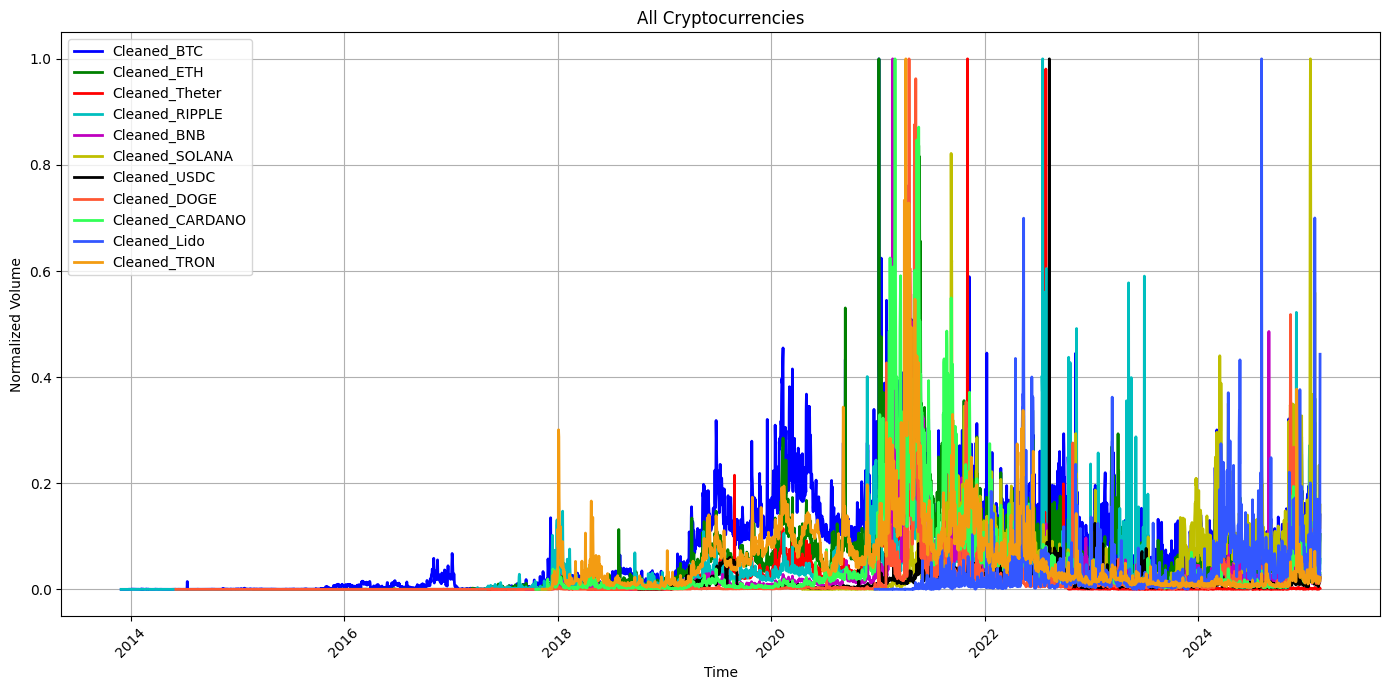

In [ ]:
# Function to plot cleaned cryptocurrency normalized volume data
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Normalized Volume Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        # Reset index because Date was saved as index
        df.reset_index(inplace=True)
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # Just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Volume_normalized'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized Volume")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

# Only the first configuration (All Cryptocurrencies)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"}
]

# Create subplot layout
fig, ax = plt.subplots(figsize=(14, 7))

# Generate the selected plot (only first config)
plot_cryptos(ax, cleaned_file_paths, exclude=plot_configs[0]["exclude"], title=plot_configs[0]["title"])

plt.tight_layout()
plt.show()


## f. Plotting All Normalized Cryptocurrencies by Market Cap

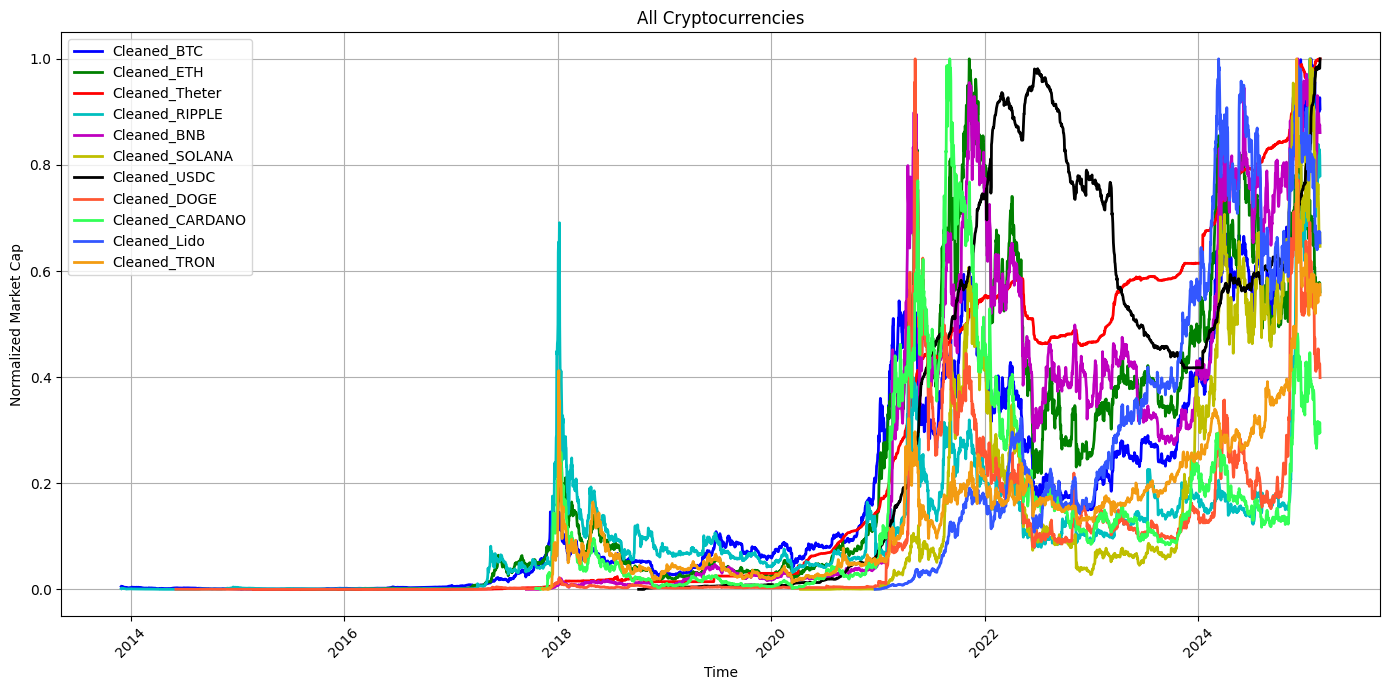

In [ ]:
# Function to plot cleaned cryptocurrency normalized market cap data
def plot_cryptos_market_cap(ax, file_paths, exclude=None, title="Cryptocurrency Normalized Market Cap Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        # Reset index because Date was saved as index
        df.reset_index(inplace=True)
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # Just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Market_cap_normalized'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized Market Cap")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

# Only the first configuration (All Cryptocurrencies)
plot_configs = [
    {"exclude": None, "title": "All Cryptocurrencies"}
]

# Create subplot layout
fig, ax = plt.subplots(figsize=(14, 7))

# Generate the selected plot (only first config)
plot_cryptos_market_cap(ax, cleaned_file_paths, exclude=plot_configs[0]["exclude"], title=plot_configs[0]["title"])

plt.tight_layout()
plt.show()


## g. Plotting All Normalized Cryptocurrencies by Price, No Stablecoins

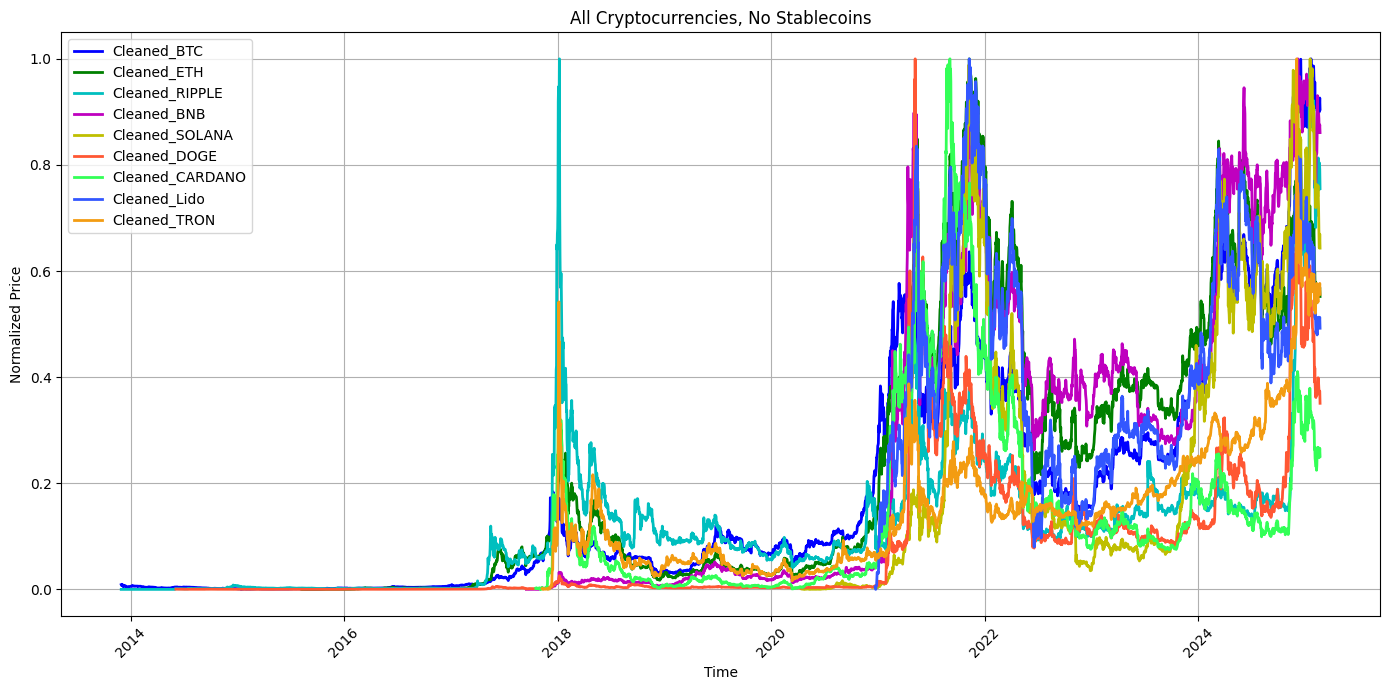

In [ ]:
# Function to plot cleaned cryptocurrency normalized price data
def plot_cryptos(ax, file_paths, exclude=None, title="Cryptocurrency Normalized Price Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        df.reset_index(inplace=True)  # Move Date back to a column if it is index
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # Just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Price_normalized'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized Price")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

plot_configs = [
    {"exclude": ["Cleaned_Theter", "Cleaned_USDC"], "title": "All Cryptocurrencies, No Stablecoins"}
]

# Create subplot layout
fig, ax = plt.subplots(figsize=(14, 7))

# Generate the selected plot (only first config)
plot_cryptos(ax, cleaned_file_paths, exclude=plot_configs[0]["exclude"], title=plot_configs[0]["title"])

plt.tight_layout()
plt.show()


## h. Plotting All Normalized Cryptocurrencies by Market Cap, No Stablecoins

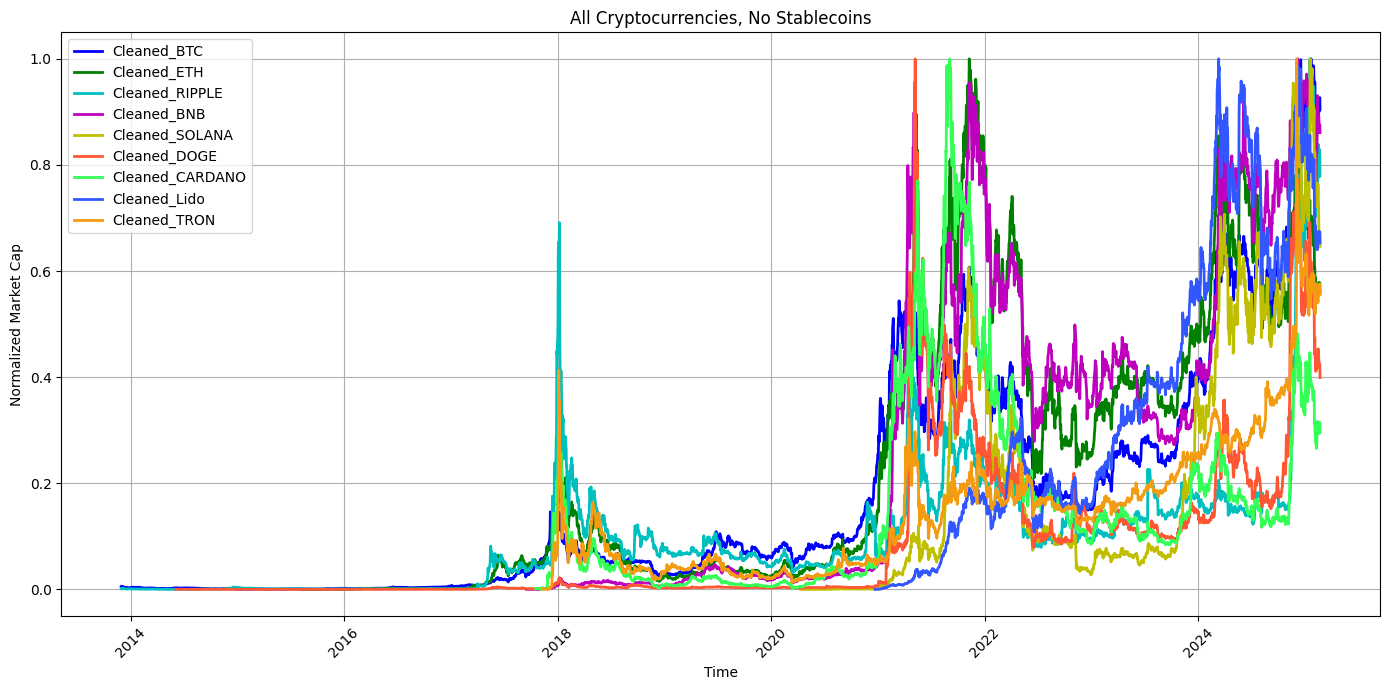

In [ ]:
# Function to plot cleaned cryptocurrency normalized market cap data
def plot_cryptos_market_cap(ax, file_paths, exclude=None, title="Cryptocurrency Normalized Market Cap Over Time"):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#FF5733', '#33FF57', '#3357FF', '#F39C12']

    for idx, file in enumerate(file_paths):
        crypto_name = os.path.basename(file).replace(".csv", "")

        if exclude and any(ex in crypto_name for ex in exclude):
            continue

        df = pd.read_csv(file)

        # Reset index because Date was saved as index
        df.reset_index(inplace=True)
        df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')  # Just in case
        df = df.sort_values(by='Date')

        ax.plot(df['Date'], df['Market_cap_normalized'], label=crypto_name, color=colors[idx % len(colors)], linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Time")
    ax.set_ylabel("Normalized Market Cap")
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# New file paths: cleaned files
cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")

plot_configs = [
    {"exclude": ["Cleaned_Theter", "Cleaned_USDC"], "title": "All Cryptocurrencies, No Stablecoins"}
]

# Create subplot layout
fig, ax = plt.subplots(figsize=(14, 7))

# Generate the selected plot (only first config)
plot_cryptos_market_cap(ax, cleaned_file_paths, exclude=plot_configs[0]["exclude"], title=plot_configs[0]["title"])

plt.tight_layout()
plt.show()


# **5. Predictive Modeling Using LSTM**
### Forecasting cryptocurrency prices with a Long Short-Term Memory (LSTM) neural network and evaluating prediction performance.

## a. Predictive Modeling

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


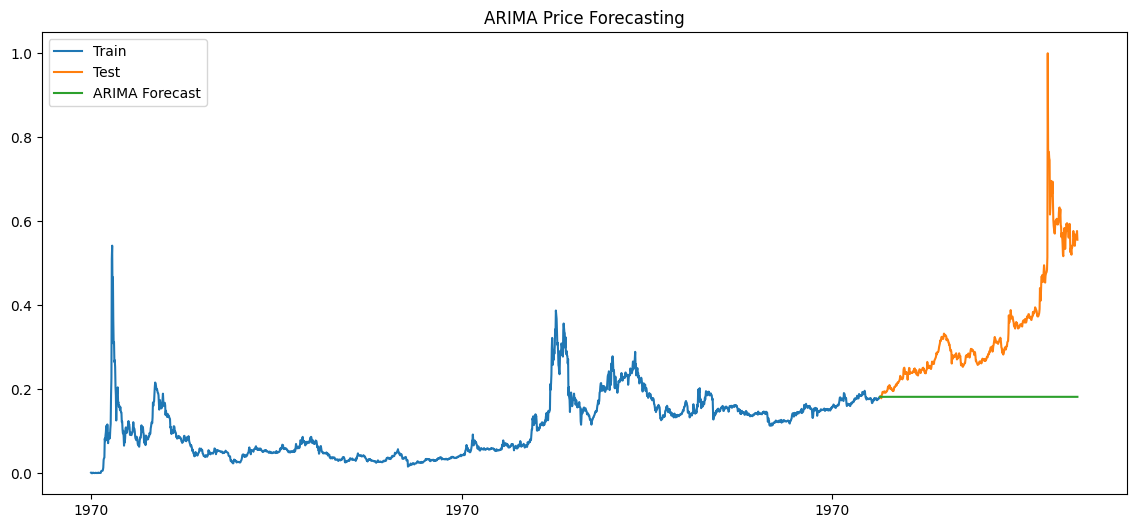

ARIMA MSE: 0.0412
ARIMA MAE: 0.1571
ARIMA R²: -1.4906
Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0044
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8199e-04
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 4.2037e-04
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 7.4832e-04
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 3.0431e-04
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.5349e-04
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 2.4328e-04
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 1.9635e-04
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.4297e-04
Epoch 10/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 1.3423e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


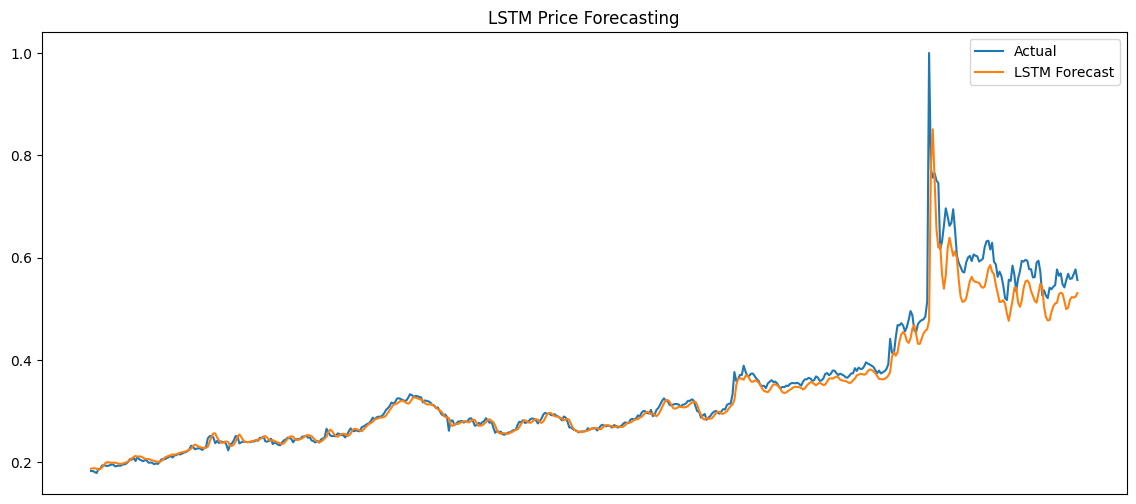

LSTM MSE: 0.0011
LSTM MAE: 0.0142
LSTM R²: 0.9352


In [ ]:


import warnings
warnings.filterwarnings("ignore")
df.index = pd.to_datetime(df.index)


# Split into training and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA Forecasting
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

arima_model = ARIMA(train['Price_normalized'], order=(5,1,0))
arima_fit = arima_model.fit()

# Forecast
arima_forecast = arima_fit.forecast(steps=len(test))
arima_mse = mean_squared_error(test['Price_normalized'], arima_forecast)
arima_mae = mean_absolute_error(test['Price_normalized'], arima_forecast)
arima_r2 = r2_score(test['Price_normalized'], arima_forecast)

# Plot ARIMA results
plt.figure(figsize=(14,6))
plt.plot(train['Price_normalized'], label='Train')
plt.plot(test['Price_normalized'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Price Forecasting')
plt.legend()
plt.show()

print(f"ARIMA MSE: {arima_mse:.4f}")
print(f"ARIMA MAE: {arima_mae:.4f}")
print(f"ARIMA R²: {arima_r2:.4f}")

# LSTM Forecasting
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare LSTM input
scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(df[['Price_normalized']])

# Helper to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_len = 20
X, y = create_sequences(price_scaled, seq_len)

X_train, X_test = X[:train_size-seq_len], X[train_size-seq_len:]
y_train, y_test = y[:train_size-seq_len], y[train_size-seq_len:]

# Define LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Predict
lstm_preds = model.predict(X_test)
lstm_preds_inverse = scaler.inverse_transform(lstm_preds)
y_test_inverse = scaler.inverse_transform(y_test)

# Evaluation
lstm_mse = mean_squared_error(y_test_inverse, lstm_preds_inverse)
lstm_mae = mean_absolute_error(y_test_inverse, lstm_preds_inverse)
lstm_r2 = r2_score(y_test_inverse, lstm_preds_inverse)

# Plot
plt.figure(figsize=(14,6))
plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual')
plt.plot(df.index[-len(y_test):], lstm_preds_inverse, label='LSTM Forecast')
plt.title('LSTM Price Forecasting')
plt.legend()
plt.show()

print(f"LSTM MSE: {lstm_mse:.4f}")
print(f"LSTM MAE: {lstm_mae:.4f}")
print(f"LSTM R²: {lstm_r2:.4f}")


# **6. Trading Strategy**
### Implementing a basic moving average crossover strategy with performance and risk metrics.

## a. Choosing a Model: ARIMA vs LSTM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Skipping crypto_risk_summary.csv: Not a recognized cryptocurrency for this analysis.

🔍 Processing: Cleaned_DOGE
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


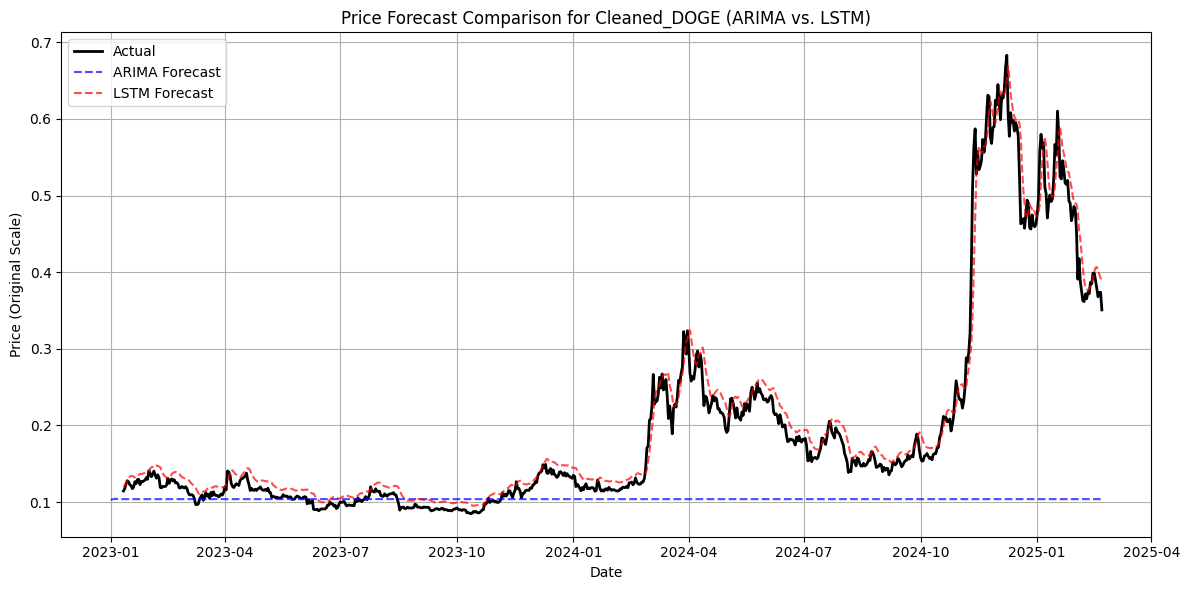


🔍 Processing: Cleaned_BNB
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


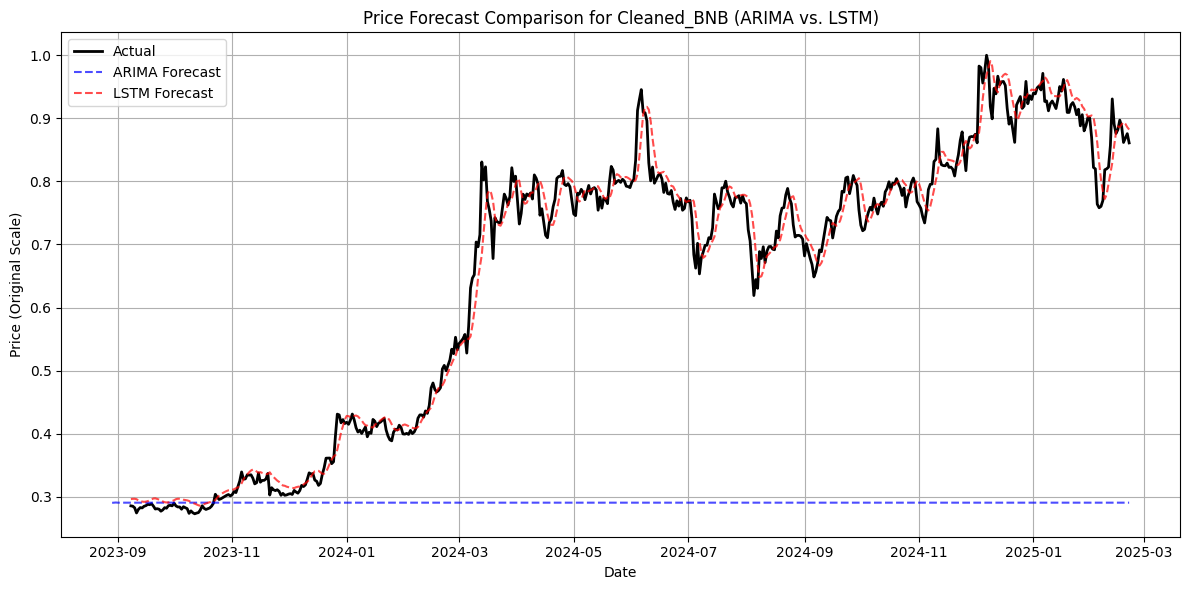


🔍 Processing: Cleaned_Lido
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


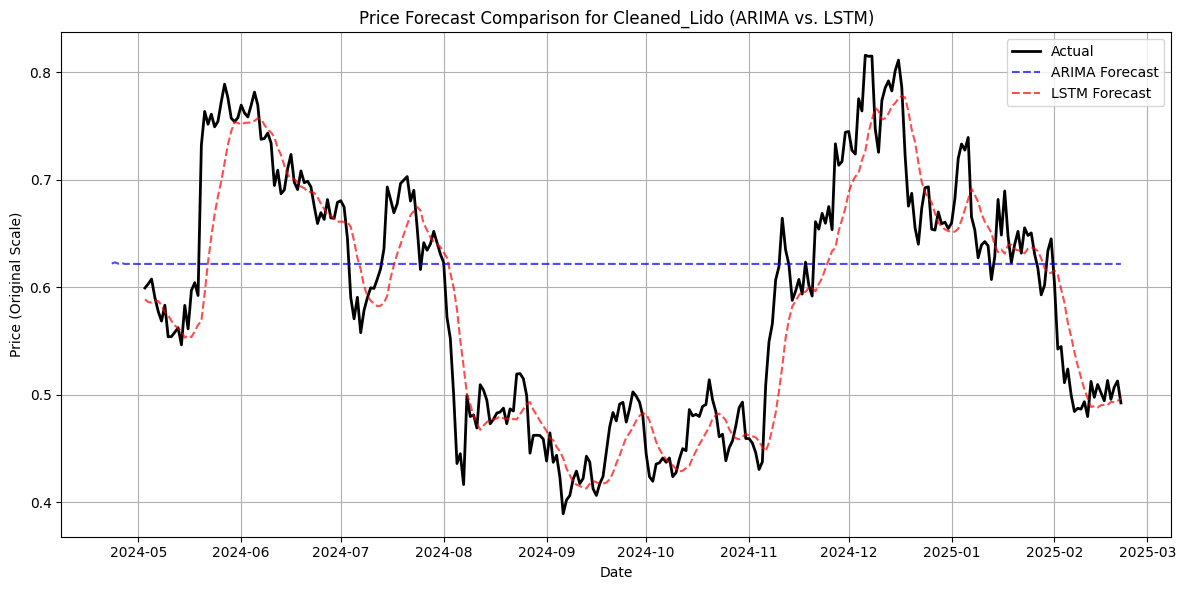


🔍 Processing: Cleaned_ETH
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


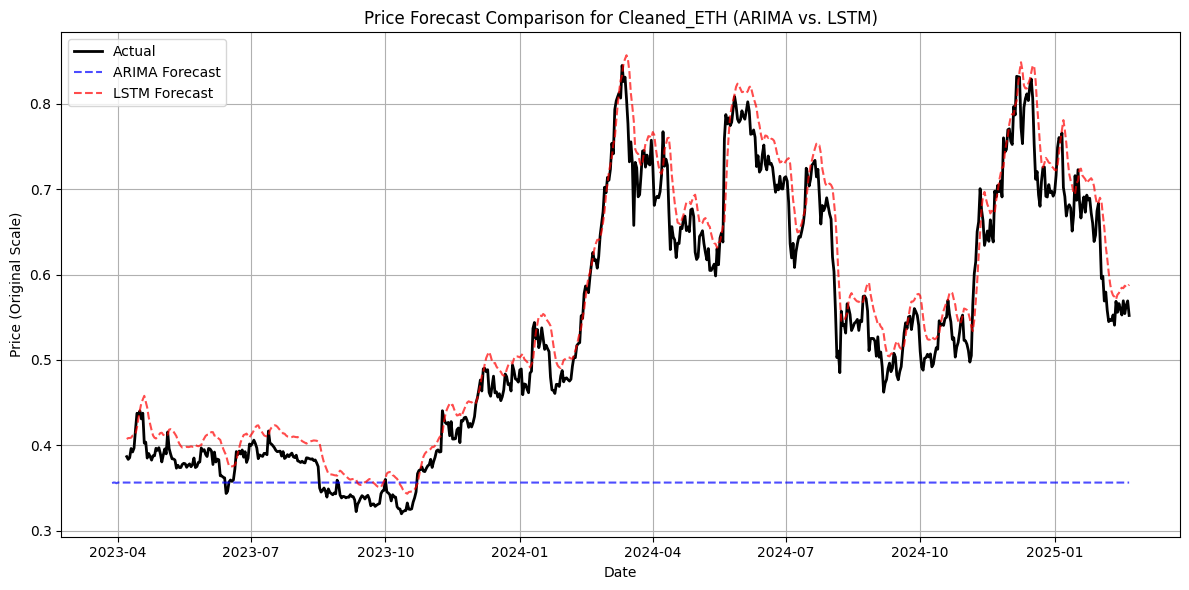


🔍 Processing: Cleaned_Theter
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


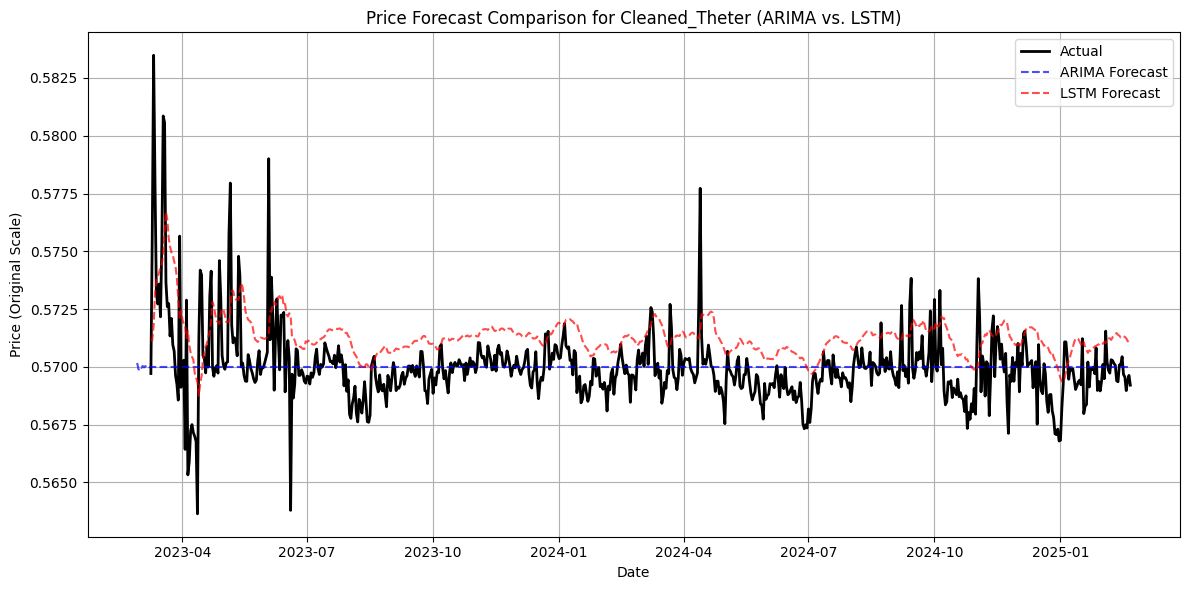


🔍 Processing: Cleaned_CARDANO
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


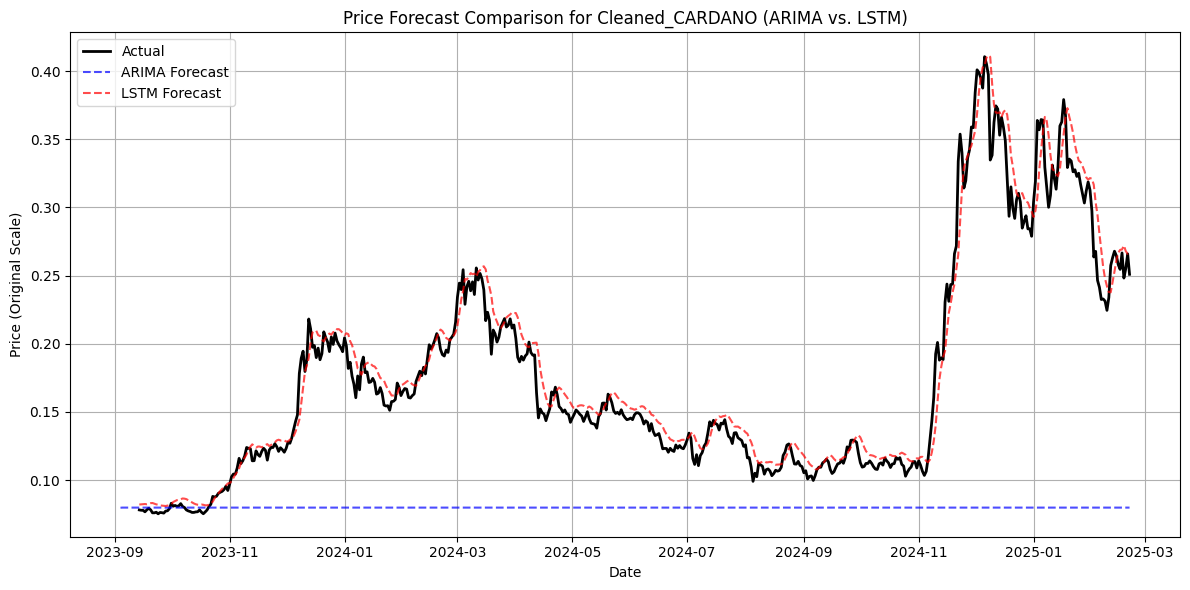


🔍 Processing: Cleaned_SOLANA
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


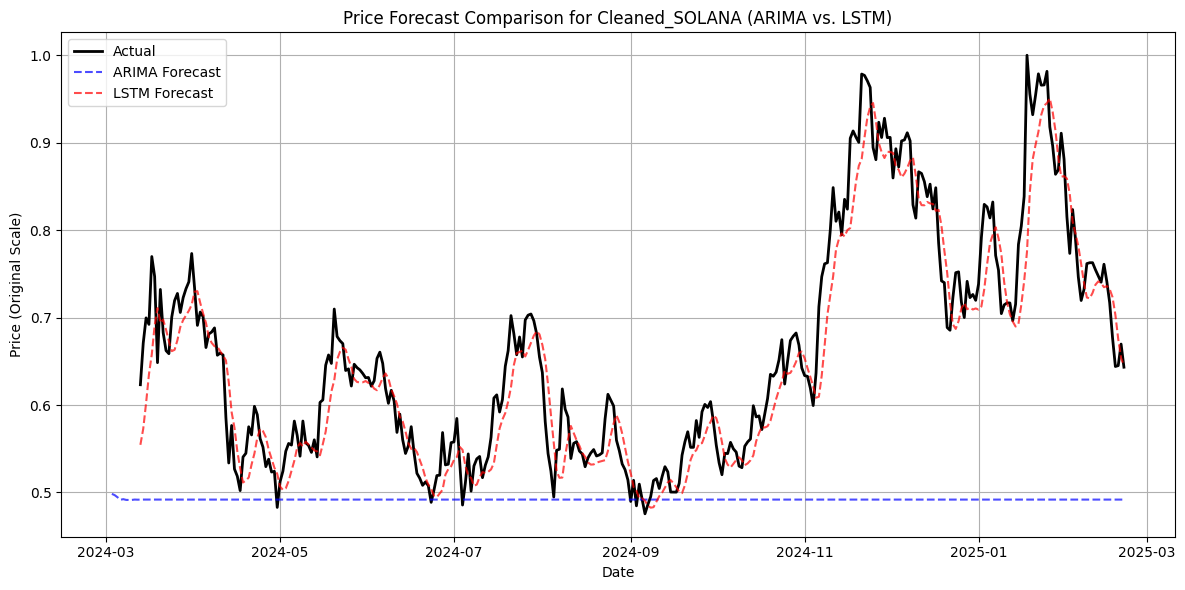


🔍 Processing: Cleaned_BTC
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


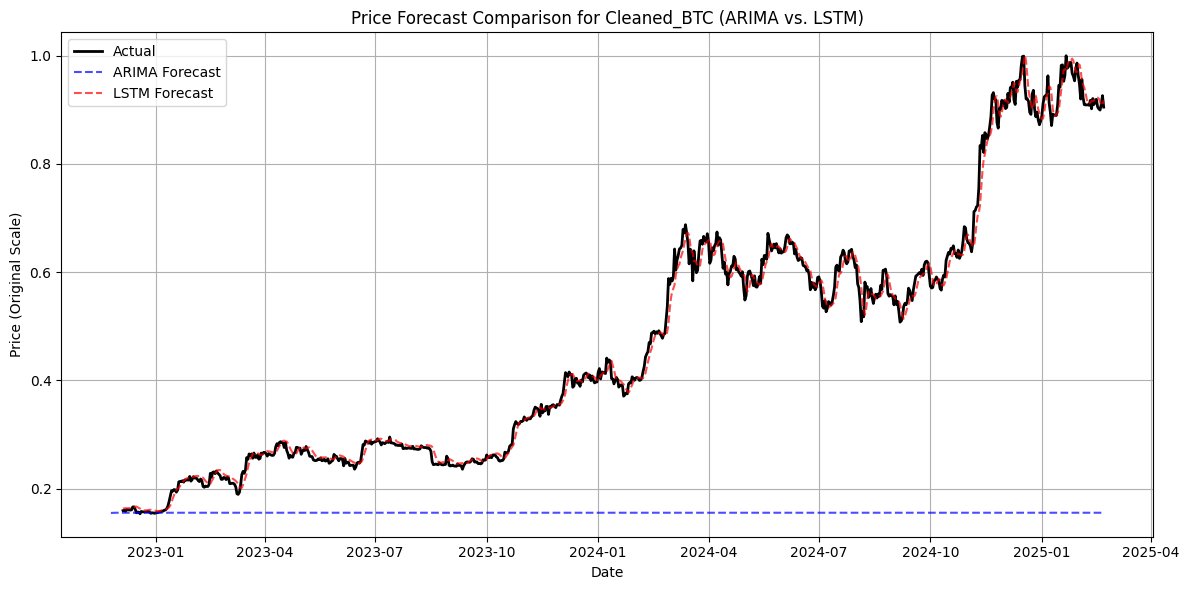


🔍 Processing: Cleaned_RIPPLE
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


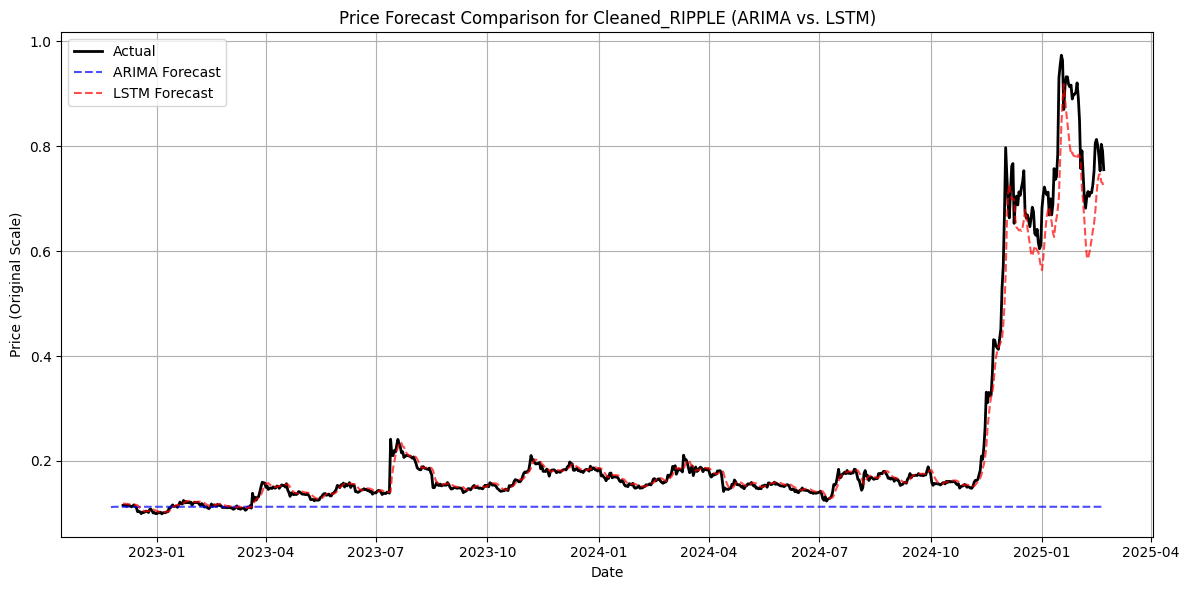


🔍 Processing: Cleaned_USDC
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


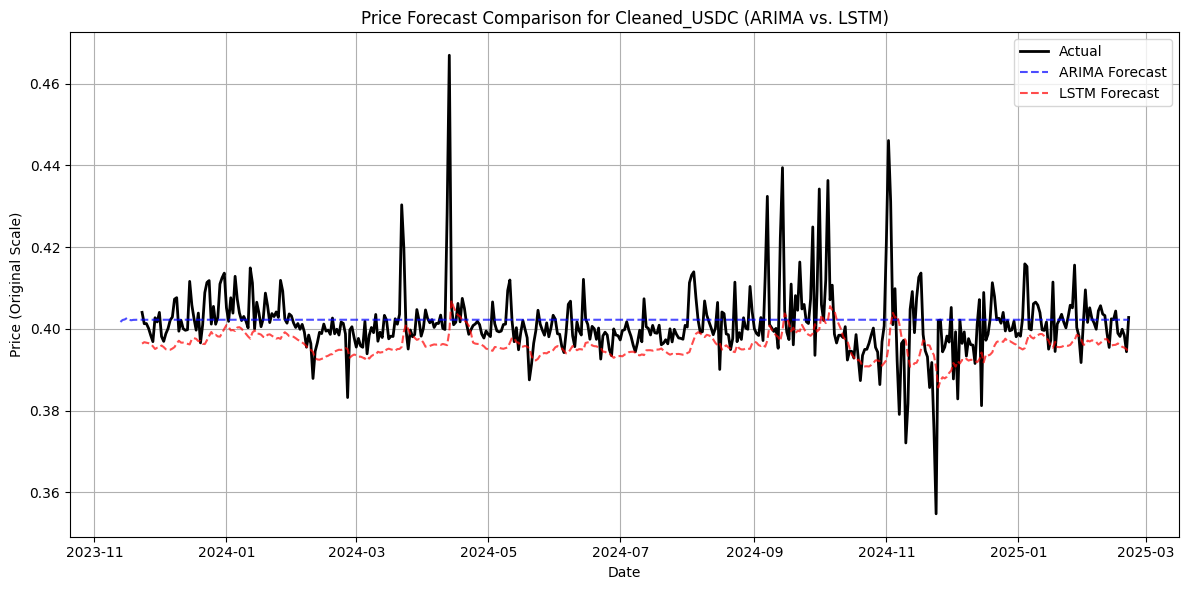


🔍 Processing: Cleaned_TRON
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


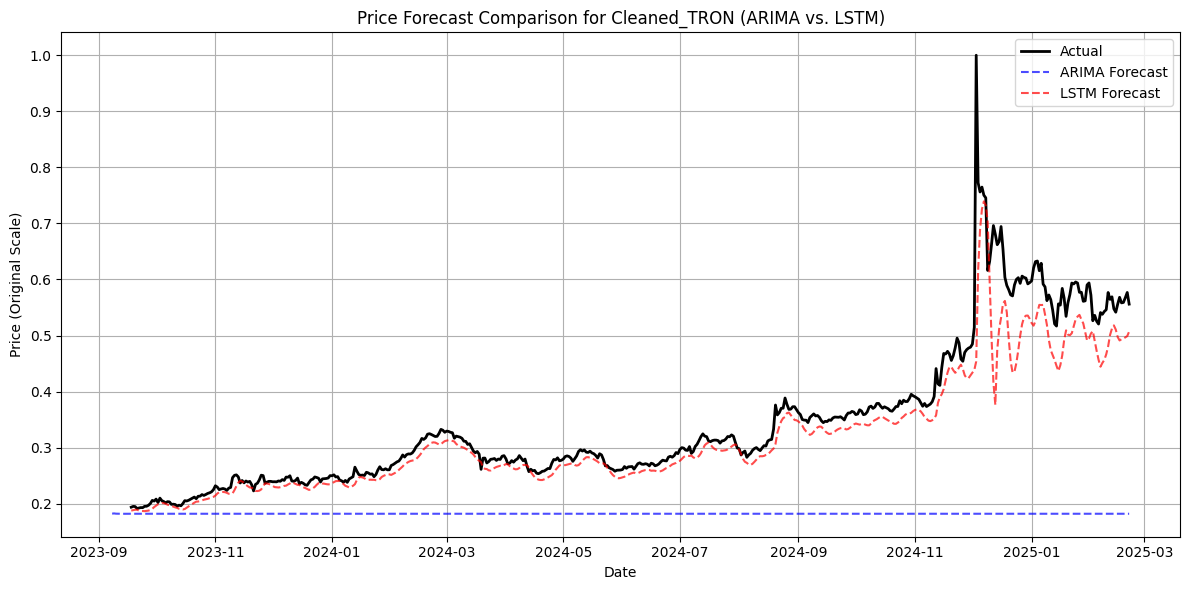


--- Model Performance Summary ---
             Crypto  ARIMA_MSE  ARIMA_MAE  ARIMA_R2  LSTM_MSE  LSTM_MAE  \
0      Cleaned_DOGE   0.026739   0.093106 -0.431435  0.000459  0.015219   
1       Cleaned_BNB   0.175890   0.354638 -2.434827  0.000841  0.020265   
2      Cleaned_Lido   0.013224   0.097141 -0.069740  0.001817  0.030616   
3       Cleaned_ETH   0.053352   0.182146 -1.483879  0.001146  0.027260   
4    Cleaned_Theter   0.000003   0.000952 -0.000634  0.000004  0.001645   
5   Cleaned_CARDANO   0.014914   0.092911 -1.349650  0.000238  0.010813   
6    Cleaned_SOLANA   0.044051   0.165996 -1.651958  0.001697  0.031649   
7       Cleaned_BTC   0.150767   0.308406 -1.707973  0.000316  0.012269   
8    Cleaned_RIPPLE   0.046539   0.107560 -0.324093  0.000939  0.013137   
9      Cleaned_USDC   0.000068   0.005056 -0.009041  0.000093  0.006664   
10     Cleaned_TRON   0.041202   0.157051 -1.490566  0.002319  0.027215   

     LSTM_R2  
0   0.975604  
1   0.983096  
2   0.857486  
3   

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import warnings

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

data_folder = '/content/drive/MyDrive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two'
sequence_length = 10

crypto_dfs = {}
valid_crypto_prefixes = ['Cleaned_BNB', 'Cleaned_BTC', 'Cleaned_CARDANO', 'Cleaned_DOGE', 'Cleaned_ETH',
                         'Cleaned_Lido', 'Cleaned_RIPPLE', 'Cleaned_SOLANA', 'Cleaned_Theter',
                         'Cleaned_USDC', 'Cleaned_TRON']

for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        currency_name = filename.replace(".csv", "")
        if currency_name in valid_crypto_prefixes:
            file_path = os.path.join(data_folder, filename)
            df = pd.read_csv(file_path)

            # Ensure essential columns exist before adding to dictionary
            if 'Date' in df.columns and 'Price_normalized' in df.columns:
                crypto_dfs[currency_name] = df
            else:
                print(f"Skipping {filename}: Missing 'Date' or 'Price_normalized' column.")
        else:
            print(f"Skipping {filename}: Not a recognized cryptocurrency for this analysis.")

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

results_summary = []

for name, df in crypto_dfs.items():
    print(f"\n🔍 Processing: {name}")

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

    prices = df['Price_normalized'].dropna()
    split_index = int(len(prices) * 0.8)
    train, test = prices[:split_index], prices[split_index:]

    try:
        # ARIMA model expects a 1D array for input
        model_arima = ARIMA(train.values, order=(5, 1, 0))
        model_arima_fit = model_arima.fit()
        forecast_arima = model_arima_fit.forecast(steps=len(test))
        mse_arima = mean_squared_error(test, forecast_arima)
        mae_arima = mean_absolute_error(test, forecast_arima)
        r2_arima = r2_score(test, forecast_arima)
    except Exception as e:
        print(f"ARIMA failed for {name}: {e}")
        forecast_arima = np.full(len(test), np.nan)
        mse_arima = mae_arima = r2_arima = np.nan

    scaler = MinMaxScaler()
    # Fit scaler only on training data to prevent data leakage
    scaled_train_prices = scaler.fit_transform(train.values.reshape(-1, 1))
    scaled_test_prices = scaler.transform(test.values.reshape(-1, 1)) # Transform test data using scaler fitted on train

    X_train, y_train = create_sequences(scaled_train_prices, sequence_length)
    X_test, y_test = create_sequences(scaled_test_prices, sequence_length)

    # Reshape X_train and X_test for LSTM input: (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model_lstm = Sequential()
    model_lstm.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer='adam', loss='mse')
    try:
        model_lstm.fit(X_train, y_train, epochs=10, verbose=0)

        predicted_lstm = model_lstm.predict(X_test)
        predicted_lstm_rescaled = scaler.inverse_transform(predicted_lstm)
        y_test_rescaled = scaler.inverse_transform(y_test)

        mse_lstm = mean_squared_error(y_test_rescaled, predicted_lstm_rescaled)
        mae_lstm = mean_absolute_error(y_test_rescaled, predicted_lstm_rescaled)
        r2_lstm = r2_score(y_test_rescaled, predicted_lstm_rescaled)
    except Exception as e:
        print(f"LSTM failed for {name}: {e}")
        predicted_lstm_rescaled = np.full(len(y_test), np.nan)
        mse_lstm = mae_lstm = r2_lstm = np.nan

    actual_test_plot_data = test.iloc[sequence_length:] # Align actual test data with LSTM predictions

    plt.figure(figsize=(12, 6))
    plt.plot(actual_test_plot_data.index, actual_test_plot_data.values, label='Actual', color='black', linewidth=2)
    plt.plot(test.index[:len(forecast_arima)], forecast_arima, label='ARIMA Forecast', linestyle='--', color='blue', alpha=0.7)
    plt.plot(actual_test_plot_data.index, predicted_lstm_rescaled.flatten(), label='LSTM Forecast', linestyle='--', color='red', alpha=0.7)
    plt.title(f"Price Forecast Comparison for {name} (ARIMA vs. LSTM)")
    plt.xlabel('Date')
    plt.ylabel('Price (Original Scale)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    results_summary.append({
        'Crypto': name,
        'ARIMA_MSE': mse_arima,
        'ARIMA_MAE': mae_arima,
        'ARIMA_R2': r2_arima,
        'LSTM_MSE': mse_lstm,
        'LSTM_MAE': mae_lstm,
        'LSTM_R2': r2_lstm
    })

summary_df = pd.DataFrame(results_summary)
print("\n--- Model Performance Summary ---")
print(summary_df)

## b. Continued Model Selection + Initial Decisions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import warnings

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

data_folder = '/content/drive/MyDrive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two'
sequence_length = 10
show_visuals = False  # Set True to visualize each currency's results

crypto_dfs = {}
for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        currency_name = filename.replace(".csv", "")
        df = pd.read_csv(os.path.join(data_folder, filename))
        crypto_dfs[currency_name] = df

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

results_summary = []

for name, df in crypto_dfs.items():
    print(f"\n🔍 Processing: {name}")

    required_columns = ['Date', 'Price_normalized']
    if not all(col in df.columns for col in required_columns):
        print(f"Skipping {name}: Missing one or more required columns ({required_columns}).")
        continue

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

    prices = df['Price_normalized'].dropna()

    # Ensure there's enough data after dropping NaNs and for sequence creation
    if len(prices) < sequence_length + 1:
        print(f"Skipping {name}: Not enough data after cleaning for sequence creation.")
        continue

    split_index = int(len(prices) * 0.8)

    # Ensure train and test sets have enough data
    if split_index <= sequence_length or len(prices) - split_index <= 0:
        print(f"Skipping {name}: Not enough data for meaningful train/test split after sequence length consideration.")
        continue

    train, test = prices[:split_index], prices[split_index:]

    try:
        if not train.empty:
            model_arima = ARIMA(train, order=(5, 1, 0))
            model_arima_fit = model_arima.fit()
            # Ensure forecast length does not exceed test length
            forecast_steps = min(len(test), len(train)) # Cap forecast steps to available test data or train data size
            if forecast_steps > 0:
                forecast_arima = model_arima_fit.forecast(steps=forecast_steps)
                # Align forecast with test index for comparison
                forecast_arima = forecast_arima.reindex(test.index[:forecast_steps])
                mse_arima = mean_squared_error(test.iloc[:forecast_steps], forecast_arima)
                mae_arima = mean_absolute_error(test.iloc[:forecast_steps], forecast_arima)
                r2_arima = r2_score(test.iloc[:forecast_steps], forecast_arima)
            else:
                mse_arima = mae_arima = r2_arima = np.nan
                forecast_arima = None
        else:
            mse_arima = mae_arima = r2_arima = np.nan
            forecast_arima = None
    except Exception as e:
        print(f"ARIMA error for {name}: {e}")
        mse_arima = mae_arima = r2_arima = np.nan
        forecast_arima = None

    scaler = MinMaxScaler()
    scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))
    train_scaled = scaled_prices[:split_index]
    test_scaled = scaled_prices[split_index:]

    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    # Ensure X_train and X_test are not empty for LSTM
    if len(X_train) == 0 or len(X_test) == 0:
        print(f"Skipping LSTM for {name}: Not enough sequences for training or testing.")
        mse_lstm = mae_lstm = r2_lstm = np.nan
        predicted_lstm_rescaled = None
    else:
        model_lstm = Sequential()
        model_lstm.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
        model_lstm.add(Dense(1))
        model_lstm.compile(optimizer='adam', loss='mse')
        model_lstm.fit(X_train, y_train, epochs=10, verbose=0)

        predicted_lstm = model_lstm.predict(X_test)
        predicted_lstm_rescaled = scaler.inverse_transform(predicted_lstm)
        y_test_rescaled = scaler.inverse_transform(y_test)

        mse_lstm = mean_squared_error(y_test_rescaled, predicted_lstm_rescaled)
        mae_lstm = mean_absolute_error(y_test_rescaled, predicted_lstm_rescaled)
        r2_lstm = r2_score(y_test_rescaled, predicted_lstm_rescaled)

    if predicted_lstm_rescaled is not None and len(predicted_lstm_rescaled) > 1 and len(y_test_rescaled) > 1:
        predicted = predicted_lstm_rescaled.flatten()
        actual = y_test_rescaled.flatten()

        # Ensure 'predicted' has enough data for positions calculation
        if len(predicted) > 1:
            positions = [1 if predicted[i+1] > predicted[i] else 0 for i in range(len(predicted)-1)]
        else:
            positions = []

        # Ensure 'actual' has enough data for actual_returns calculation
        if len(actual) > 1:
            actual_returns = np.diff(actual) / actual[:-1]
        else:
            actual_returns = []

        # Ensure positions and actual_returns align for strategy_returns
        if len(positions) > 0 and len(actual_returns) > 0:
            strategy_returns = [positions[i] * actual_returns[i] for i in range(min(len(positions), len(actual_returns)))]
        else:
            strategy_returns = []

        if len(strategy_returns) > 0:
            portfolio_value = [1]
            for r in strategy_returns:
                portfolio_value.append(portfolio_value[-1] * (1 + r))

            cumulative_return = portfolio_value[-1] - 1
            volatility = np.std(strategy_returns)
            sharpe_ratio = np.mean(strategy_returns) / volatility if volatility != 0 else 0
            max_drawdown = np.max(np.maximum.accumulate(portfolio_value) - portfolio_value) / np.max(portfolio_value)
        else:
            cumulative_return = volatility = sharpe_ratio = max_drawdown = np.nan
            print(f"Strategy simulation skipped for {name}: Not enough returns data.")
    else:
        cumulative_return = volatility = sharpe_ratio = max_drawdown = np.nan
        print(f"Strategy simulation skipped for {name}: No valid LSTM predictions.")

    percent_change = 0 # Default value
    if predicted_lstm_rescaled is not None and len(predicted_lstm_rescaled) >= 4:
        # Ensure we're working with scalar values by indexing [0] or using .item()
        price_delta = predicted_lstm_rescaled[-1][0] - predicted_lstm_rescaled[-4][0]
        # Check for division by zero
        if predicted_lstm_rescaled[-4][0] != 0:
            percent_change = price_delta / predicted_lstm_rescaled[-4][0]
        else:
            percent_change = 0 # Handle division by zero

    threshold = 0.005  # 0.5% price movement for buy/sell signal
    if percent_change > threshold:
        recommendation = "BUY"
    elif percent_change < -threshold:
        recommendation = "SELL"
    else:
        recommendation = "HOLD"

    confidence_score = abs(percent_change)
    # Ensure confidence_score is a scalar before rounding and min
    confidence_percent = min(100, round(float(confidence_score) * 2000)) # Convert to float before rounding

    # Handle cases where sharpe_ratio or volatility might be NaN or very small
    risk_score = 0
    if not np.isnan(sharpe_ratio) and sharpe_ratio != 0:
        risk_score += (1 / (sharpe_ratio + 1e-6)) # Add a small epsilon to prevent division by zero
    if not np.isnan(max_drawdown):
        risk_score += max_drawdown
    if not np.isnan(volatility):
        risk_score += volatility

    if risk_score < 2.0:
        risk_level = "Low"
    elif risk_score < 3.5:
        risk_level = "Moderate"
    else:
        risk_level = "High"

    results_summary.append({
        'Crypto': name,
        'Sharpe': sharpe_ratio,
        'Max_Drawdown': max_drawdown,
        'Cumulative_Return': cumulative_return,
        'Recommendation': recommendation,
        'Confidence_%': confidence_percent,
        'Risk_Level': risk_level
    })

    if show_visuals:
        if predicted_lstm_rescaled is not None and len(predicted_lstm_rescaled) > 0 and len(y_test_rescaled) > 0:
            plt.figure(figsize=(10, 4))
            plt.plot(y_test_rescaled, label='Actual')
            plt.plot(predicted_lstm_rescaled, label='LSTM Forecast')
            plt.title(f"LSTM Forecast for {name}")
            plt.legend()
            plt.show()
        else:
            print(f"Cannot show visuals for {name}: No valid LSTM predictions.")

summary_df = pd.DataFrame(results_summary)
print("\n✅ Forecasting Complete for All Cryptocurrencies")
display(summary_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔍 Processing: crypto_risk_summary
Skipping crypto_risk_summary: Missing one or more required columns (['Date', 'Price_normalized']).

🔍 Processing: Cleaned_DOGE
ARIMA error for Cleaned_DOGE: Input contains NaN.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

🔍 Processing: Cleaned_BNB
ARIMA error for Cleaned_BNB: Input contains NaN.
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

🔍 Processing: Cleaned_Lido
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step

🔍 Processing: Cleaned_ETH
ARIMA error for Cleaned_ETH: Input contains NaN.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

🔍 Processing: Cleaned_Theter
ARIMA error for Cleaned_Theter: Input contains NaN.
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

🔍 Processing: Cleaned_CARDANO
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

🔍 Processing: Cleaned_SOLANA
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step

🔍 Processing: Cleaned_BTC
ARIMA error for Cleaned_BTC: 

Crypto    Sharpe  Max_Drawdown  Cumulative_Return Recommendation  \
0      Cleaned_DOGE  0.056093      0.368118           1.932690           SELL   
1       Cleaned_BNB  0.098312      0.208496           1.700575           SELL   
2      Cleaned_Lido -0.012926      0.389980          -0.209570           HOLD   
3       Cleaned_ETH  0.024886      0.321902           0.234750           HOLD   
4    Cleaned_Theter -0.117156      0.176722          -0.156823           HOLD   
5   Cleaned_CARDANO  0.090496      0.216595           2.825371           SELL   
6    Cleaned_SOLANA  0.046899      0.320800           0.413244           SELL   
7       Cleaned_BTC  0.083240      0.187225           2.150915           HOLD   
8    Cleaned_RIPPLE  0.046826      0.328623           1.192574           SELL   
9      Cleaned_USDC -0.161620      0.715961          -0.715961           HOLD   
10     Cleaned_TRON  0.062664      0.458315           2.053538            BUY   

    Confidence_% Risk_Level  
0             63       High  
1             21       High  
2              7        Low  
3              5       High  
4              1        Low  
5             22       High  
6            100       High  
7              9       High  
8             62       High  
9              7        Low  
10            32       High

from matplotlib import pyplot as plt
summary_df['Sharpe'].plot(kind='hist', bins=20, title='Sharpe')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Max_Drawdown'].plot(kind='hist', bins=20, title='Max_Drawdown')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Cumulative_Return'].plot(kind='hist', bins=20, title='Cumulative_Return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Confidence_%'].plot(kind='hist', bins=20, title='Confidence_%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_df.groupby('Recommendation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_df.groupby('Risk_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Sharpe', y='Max_Drawdown', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Max_Drawdown', y='Cumulative_Return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Cumulative_Return', y='Confidence_%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Sharpe'].plot(kind='line', figsize=(8, 4), title='Sharpe')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Max_Drawdown'].plot(kind='line', figsize=(8, 4), title='Max_Drawdown')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Cumulative_Return'].plot(kind='line', figsize=(8, 4), title='Cumulative_Return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Confidence_%'].plot(kind='line', figsize=(8, 4), title='Confidence_%')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Risk_Level'].value_counts()
    for x_label, grp in summary_df.groupby('Recommendation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Recommendation')
_ = plt.ylabel('Risk_Level')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Sharpe', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Risk_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Sharpe', y='Risk_Level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Recommendation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Max_Drawdown', y='Recommendation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Risk_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Max_Drawdown', y='Risk_Level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## c. Trading Strategy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

🔍 Processing: crypto_risk_summary
Skipping crypto_risk_summary: Missing one or more required columns (['Date', 'Price_normalized']).

🔍 Processing: Cleaned_DOGE
ARIMA error for Cleaned_DOGE: Input contains NaN.
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

📈 Strategy Performance for Cleaned_DOGE:
Cumulative Return: 2.2349
Volatility (Std Dev): 0.0359
Sharpe Ratio: 0.06
Max Drawdown: 0.3052


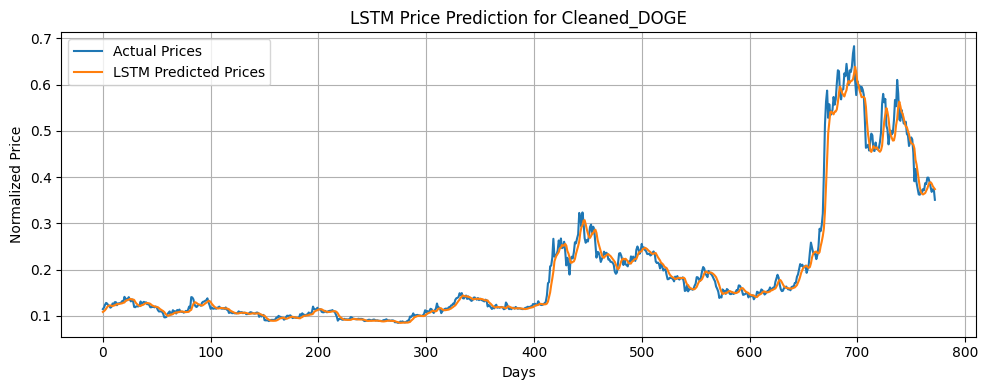

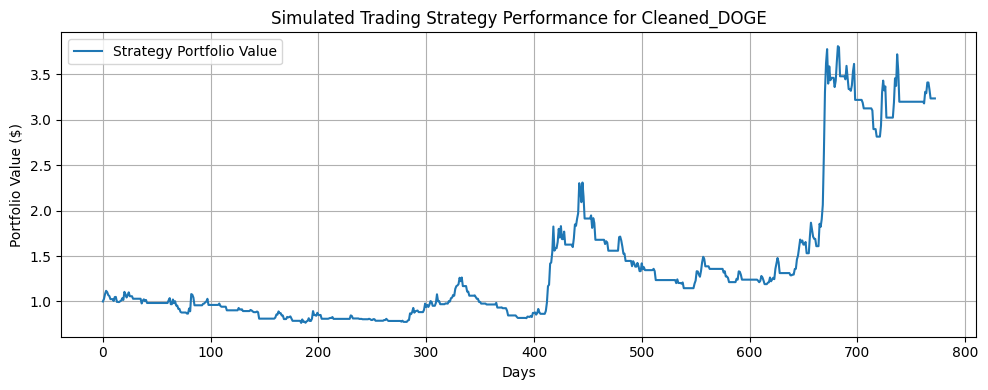


🔍 Processing: Cleaned_BNB
ARIMA error for Cleaned_BNB: Input contains NaN.
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

📈 Strategy Performance for Cleaned_BNB:
Cumulative Return: 0.7517
Volatility (Std Dev): 0.0218
Sharpe Ratio: 0.06
Max Drawdown: 0.2340


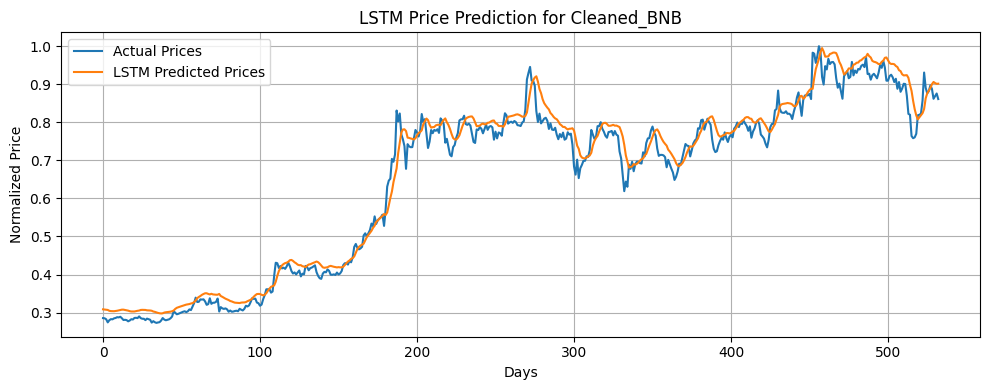

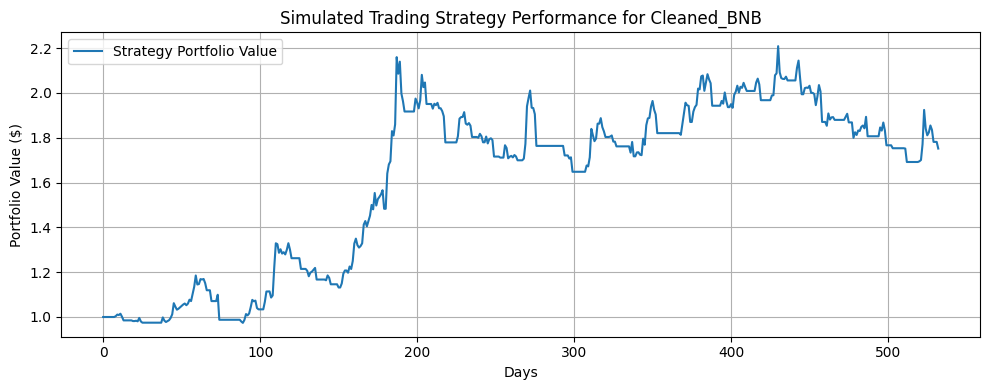


🔍 Processing: Cleaned_Lido
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

📈 Strategy Performance for Cleaned_Lido:
Cumulative Return: -0.1583
Volatility (Std Dev): 0.0295
Sharpe Ratio: -0.01
Max Drawdown: 0.3219


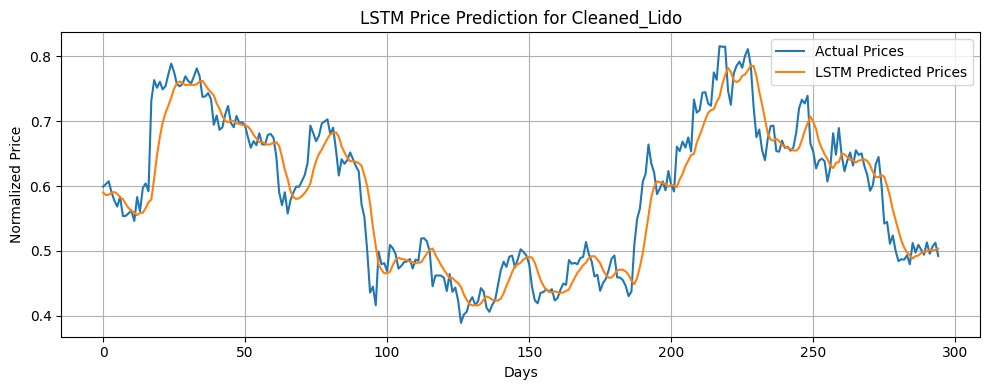

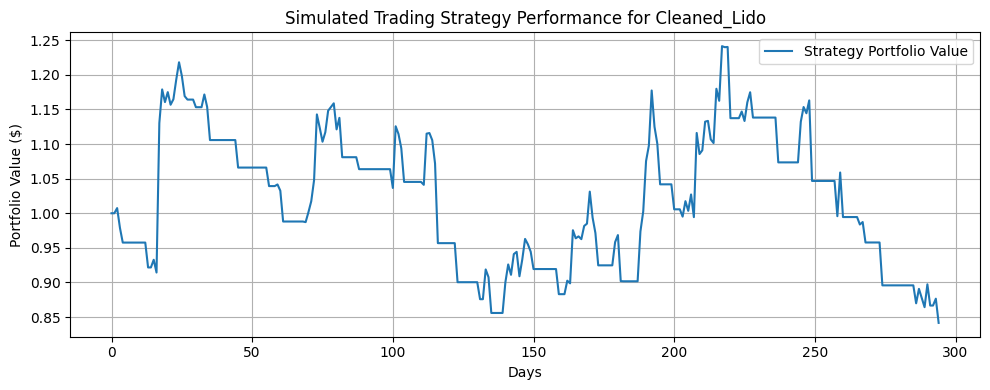


🔍 Processing: Cleaned_ETH
ARIMA error for Cleaned_ETH: Input contains NaN.
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

📈 Strategy Performance for Cleaned_ETH:
Cumulative Return: 0.1916
Volatility (Std Dev): 0.0208
Sharpe Ratio: 0.02
Max Drawdown: 0.3537


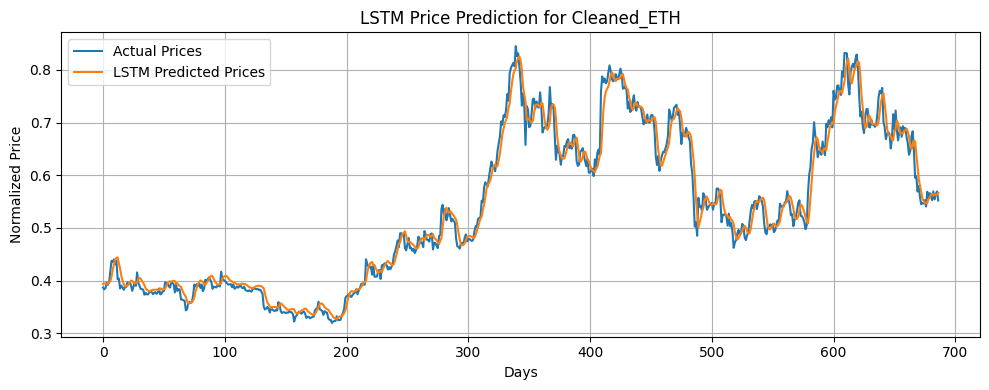

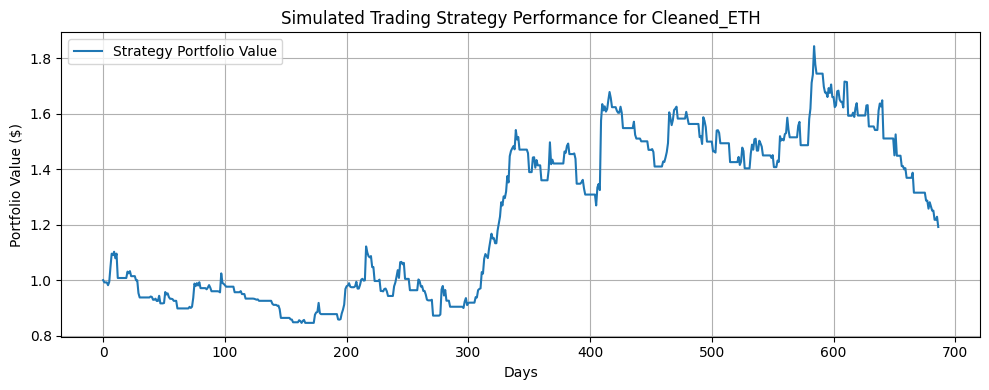


🔍 Processing: Cleaned_Theter
ARIMA error for Cleaned_Theter: Input contains NaN.
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

📈 Strategy Performance for Cleaned_Theter:
Cumulative Return: -0.1837
Volatility (Std Dev): 0.0019
Sharpe Ratio: -0.15
Max Drawdown: 0.1947


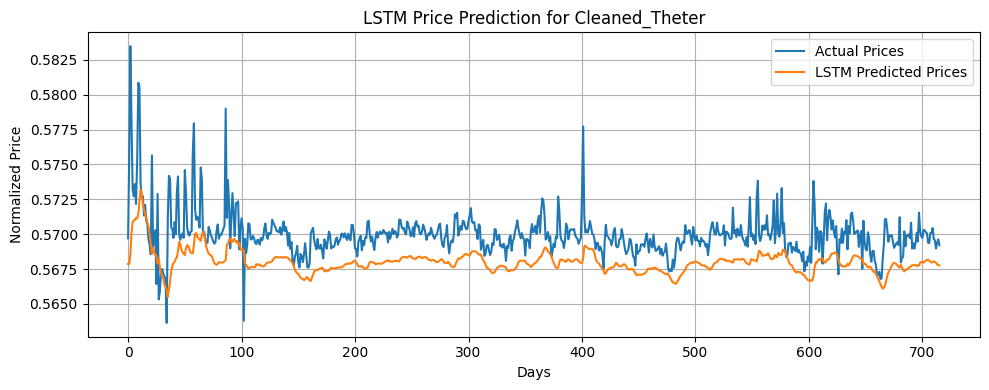

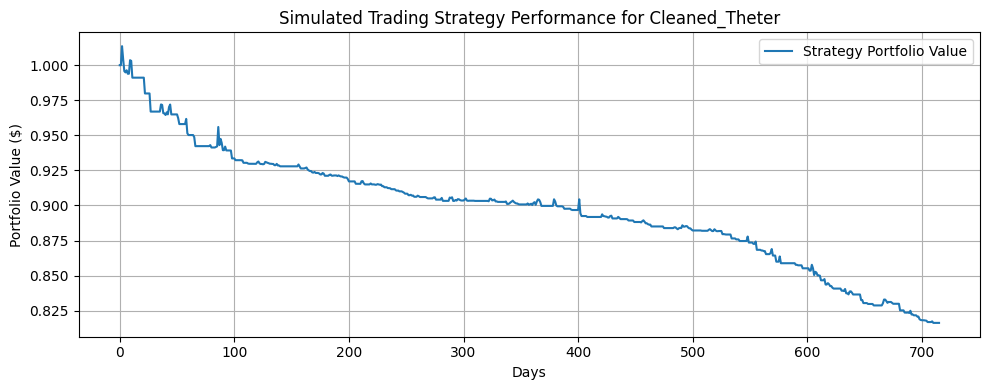


🔍 Processing: Cleaned_CARDANO
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

📈 Strategy Performance for Cleaned_CARDANO:
Cumulative Return: 2.0854
Volatility (Std Dev): 0.0347
Sharpe Ratio: 0.08
Max Drawdown: 0.2934


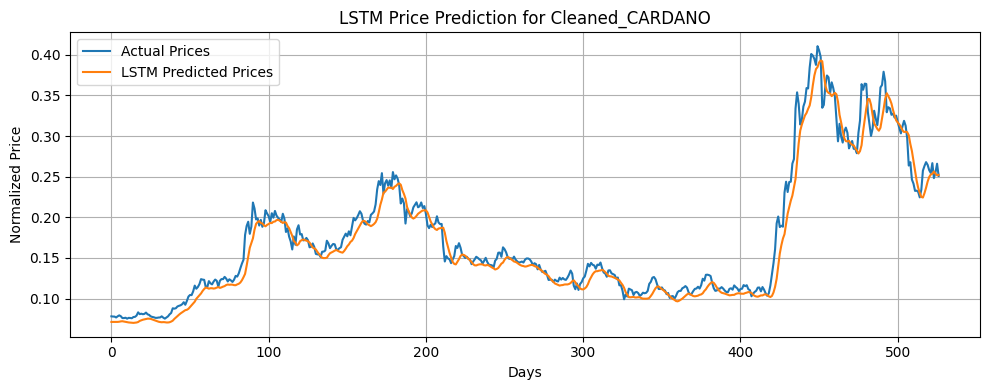

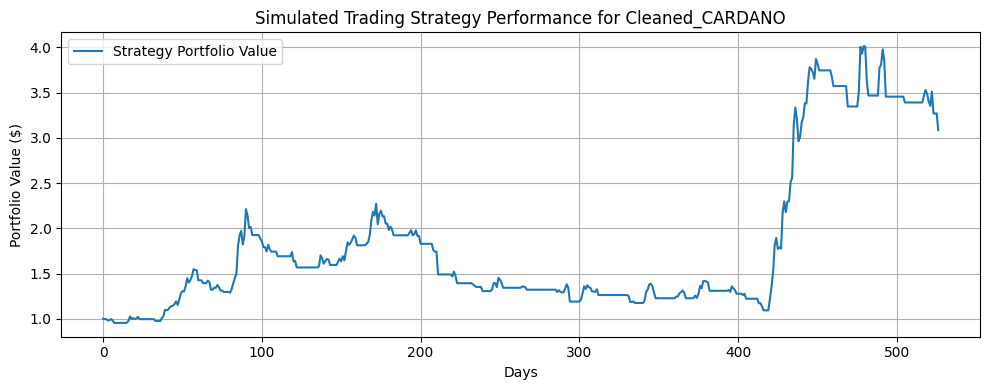


🔍 Processing: Cleaned_SOLANA
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

📈 Strategy Performance for Cleaned_SOLANA:
Cumulative Return: 0.4812
Volatility (Std Dev): 0.0305
Sharpe Ratio: 0.05
Max Drawdown: 0.2413


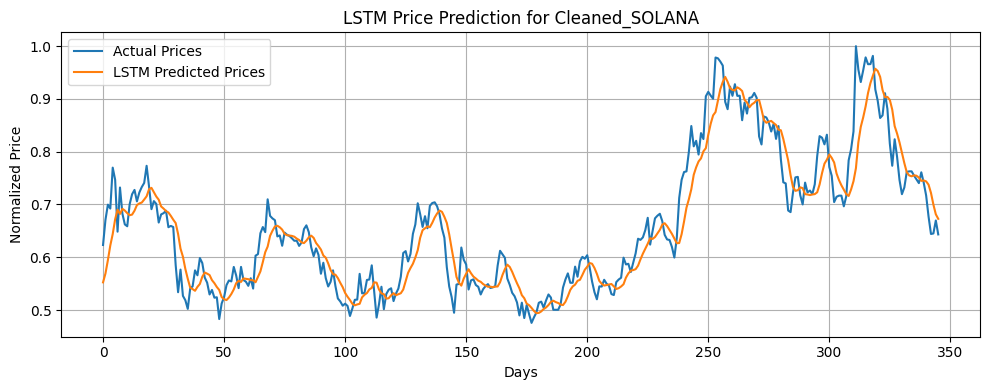

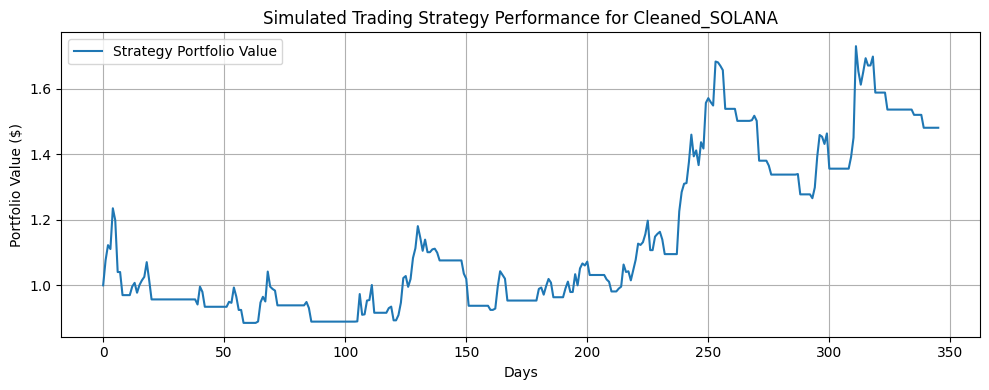


🔍 Processing: Cleaned_BTC
ARIMA error for Cleaned_BTC: Input contains NaN.
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

📈 Strategy Performance for Cleaned_BTC:
Cumulative Return: 1.7707
Volatility (Std Dev): 0.0188
Sharpe Ratio: 0.08
Max Drawdown: 0.1551


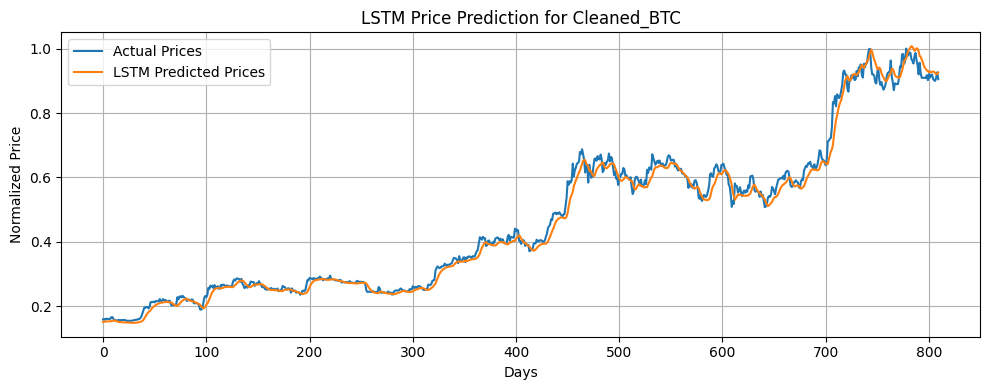

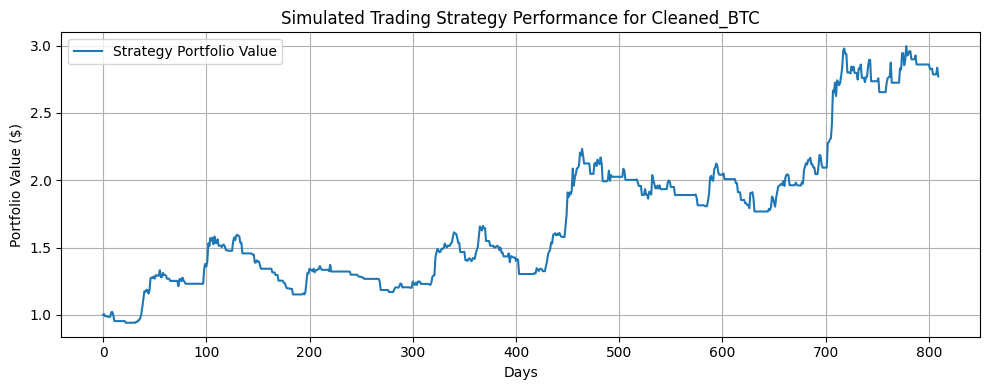


🔍 Processing: Cleaned_RIPPLE
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

📈 Strategy Performance for Cleaned_RIPPLE:
Cumulative Return: 1.6057
Volatility (Std Dev): 0.0312
Sharpe Ratio: 0.05
Max Drawdown: 0.4135


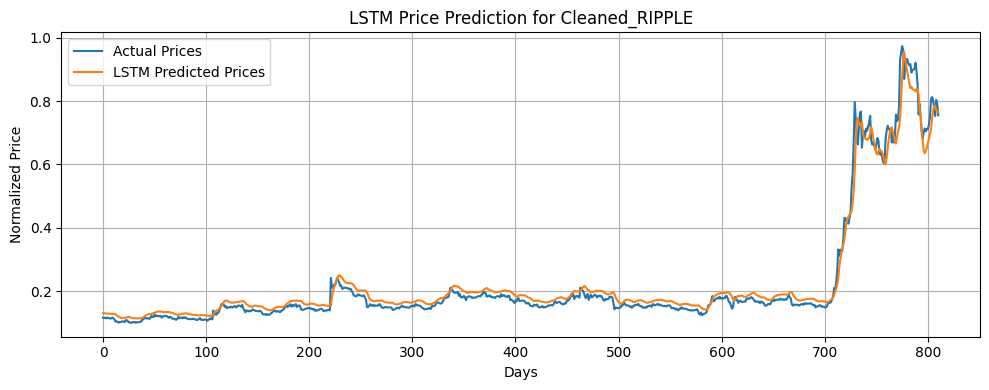

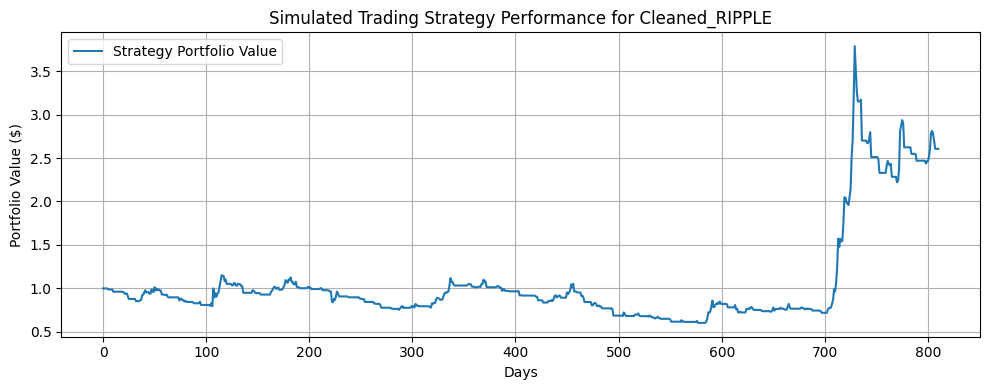


🔍 Processing: Cleaned_USDC
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

📈 Strategy Performance for Cleaned_USDC:
Cumulative Return: -0.6797
Volatility (Std Dev): 0.0166
Sharpe Ratio: -0.14
Max Drawdown: 0.6797


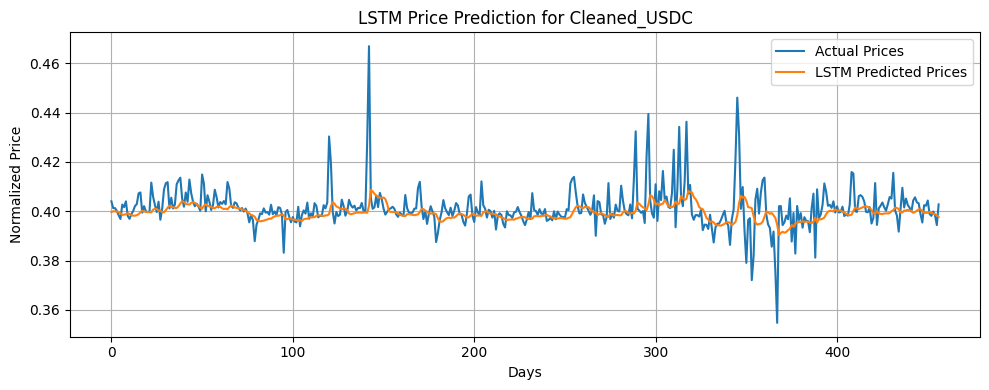

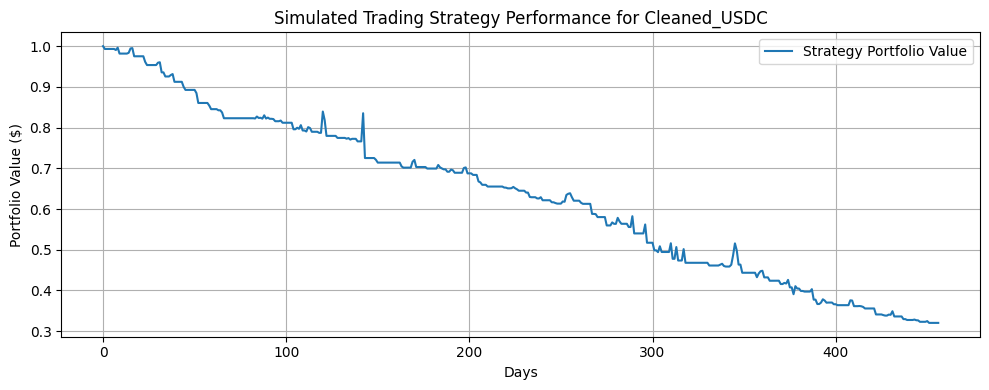


🔍 Processing: Cleaned_TRON
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

📈 Strategy Performance for Cleaned_TRON:
Cumulative Return: 2.4603
Volatility (Std Dev): 0.0459
Sharpe Ratio: 0.07
Max Drawdown: 0.3617


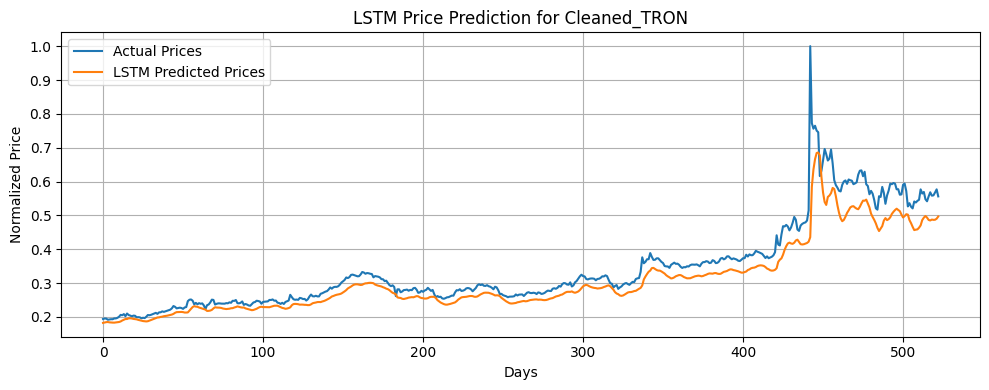

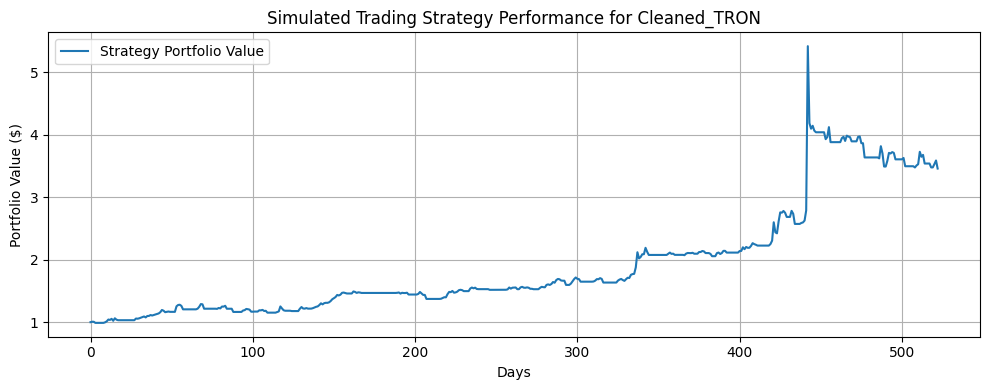


✅ Forecasting Complete for All Cryptocurrencies


Crypto  ARIMA_MSE  ARIMA_MAE  ARIMA_R2  LSTM_MSE  LSTM_MAE  \
0      Cleaned_DOGE        NaN        NaN       NaN  0.000390  0.010021   
1       Cleaned_BNB        NaN        NaN       NaN  0.001158  0.025843   
2      Cleaned_Lido   0.013224   0.097141 -0.069740  0.001439  0.027376   
3       Cleaned_ETH        NaN        NaN       NaN  0.000489  0.015569   
4    Cleaned_Theter        NaN        NaN       NaN  0.000006  0.001998   
5   Cleaned_CARDANO   0.014914   0.092911 -1.349650  0.000283  0.011530   
6    Cleaned_SOLANA   0.044051   0.165996 -1.651958  0.001989  0.033528   
7       Cleaned_BTC        NaN        NaN       NaN  0.000541  0.016322   
8    Cleaned_RIPPLE   0.046539   0.107560 -0.324093  0.000673  0.019009   
9      Cleaned_USDC   0.000068   0.005056 -0.009041  0.000069  0.004844   
10     Cleaned_TRON   0.041202   0.157051 -1.490566  0.002367  0.034449   

     LSTM_R2    Sharpe  Max_Drawdown  Cumulative_Return  
0   0.979271  0.059595      0.305247           2.234902  
1   0.976723  0.059018      0.234033           0.751698  
2   0.887172 -0.005582      0.321944          -0.158329  
3   0.977208  0.022473      0.353676           0.191630  
4  -1.196671 -0.146324      0.194671          -0.183729  
5   0.954980  0.078469      0.293386           2.085363  
6   0.880107  0.052357      0.241273           0.481151  
7   0.990188  0.076373      0.155128           1.770686  
8   0.981005  0.052790      0.413463           1.605725  
9   0.002676 -0.141859      0.679672          -0.679672  
10  0.855751  0.068076      0.361655           2.460297

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import warnings

warnings.filterwarnings("ignore")
drive.mount('/content/drive')

data_folder = '/content/drive/MyDrive/ELEC3612 Crypto Project/Cleaned_Transformed_Data_Two'
sequence_length = 10
show_visuals = True  # Set True to visualize each currency's results

crypto_dfs = {}
for filename in os.listdir(data_folder):
    if filename.endswith(".csv"):
        currency_name = filename.replace(".csv", "")
        df = pd.read_csv(os.path.join(data_folder, filename))
        crypto_dfs[currency_name] = df

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

results_summary = []

for name, df in crypto_dfs.items():
    print(f"\n🔍 Processing: {name}")

    required_columns = ['Date', 'Price_normalized']
    if not all(col in df.columns for col in required_columns):
        print(f"Skipping {name}: Missing one or more required columns ({required_columns}).")
        continue # Skip this file and move to the next

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    df.set_index('Date', inplace=True)

    prices = df['Price_normalized'].dropna()

    # Ensure there's enough data after dropping NaNs and for sequence creation
    if len(prices) < sequence_length + 1:
        print(f"Skipping {name}: Not enough data after cleaning for sequence creation.")
        continue

    split_index = int(len(prices) * 0.8)

    # Ensure train and test sets have enough data
    if split_index <= sequence_length or len(prices) - split_index <= 0:
        print(f"Skipping {name}: Not enough data for meaningful train/test split after sequence length consideration.")
        continue

    train, test = prices[:split_index], prices[split_index:]

    try:
        # ARIMA requires non-empty train set
        if not train.empty:
            model_arima = ARIMA(train, order=(5, 1, 0))
            model_arima_fit = model_arima.fit()
            # Ensure forecast length does not exceed test length
            forecast_steps = min(len(test), len(train)) # Cap forecast steps to available test data or train data size
            if forecast_steps > 0:
                forecast_arima = model_arima_fit.forecast(steps=forecast_steps)
                # Align forecast with test index for comparison
                forecast_arima = forecast_arima.reindex(test.index[:forecast_steps])
                mse_arima = mean_squared_error(test.iloc[:forecast_steps], forecast_arima)
                mae_arima = mean_absolute_error(test.iloc[:forecast_steps], forecast_arima)
                r2_arima = r2_score(test.iloc[:forecast_steps], forecast_arima)
            else:
                mse_arima = mae_arima = r2_arima = np.nan
                forecast_arima = None
        else:
            mse_arima = mae_arima = r2_arima = np.nan
            forecast_arima = None
    except Exception as e:
        print(f"ARIMA error for {name}: {e}")
        mse_arima = mae_arima = r2_arima = np.nan
        forecast_arima = None

    scaler = MinMaxScaler()
    scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))
    train_scaled = scaled_prices[:split_index]
    test_scaled = scaled_prices[split_index:]

    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    # Ensure X_train and X_test are not empty for LSTM
    if len(X_train) == 0 or len(X_test) == 0:
        print(f"Skipping LSTM for {name}: Not enough sequences for training or testing.")
        mse_lstm = mae_lstm = r2_lstm = np.nan
        predicted_prices = None # Set to None if prediction cannot be made
    else:
        model_lstm = Sequential()
        model_lstm.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
        model_lstm.add(Dense(1))
        model_lstm.compile(optimizer='adam', loss='mse')
        model_lstm.fit(X_train, y_train, epochs=10, verbose=0)

        # Run LSTM prediction
        predicted_lstm = model_lstm.predict(X_test)

        # Rescale predicted and actual back to original scale (undo MinMaxScaler)
        predicted_prices = scaler.inverse_transform(predicted_lstm)
        actual_prices = scaler.inverse_transform(y_test)

        # Metrics for LSTM predictions
        mse_lstm = mean_squared_error(actual_prices, predicted_prices)
        mae_lstm = mean_absolute_error(actual_prices, predicted_prices)
        r2_lstm = r2_score(actual_prices, predicted_prices)

    if predicted_prices is not None and len(predicted_prices) > 1 and len(actual_prices) > 1:
        predicted = predicted_prices.flatten()
        actual = actual_prices.flatten()

        # Ensure 'predicted' has enough data for positions calculation
        if len(predicted) > 1:
            positions = [1 if predicted[i+1] > predicted[i] else 0 for i in range(len(predicted)-1)]
        else:
            positions = []

        # Ensure 'actual' has enough data for actual_returns calculation
        if len(actual) > 1:
            actual_returns = np.diff(actual) / actual[:-1]
        else:
            actual_returns = []

        # Ensure positions and actual_returns align for strategy_returns
        if len(positions) > 0 and len(actual_returns) > 0:
            strategy_returns = [positions[i] * actual_returns[i] for i in range(min(len(positions), len(actual_returns)))]
        else:
            strategy_returns = []

        if len(strategy_returns) > 0:
            portfolio_value = [1]
            for r in strategy_returns:
                portfolio_value.append(portfolio_value[-1] * (1 + r))

            cumulative_return = portfolio_value[-1] - 1
            volatility = np.std(strategy_returns)
            sharpe_ratio = np.mean(strategy_returns) / volatility if volatility != 0 else 0
            max_drawdown = np.max(np.maximum.accumulate(portfolio_value) - portfolio_value) / np.max(portfolio_value)
        else:
            cumulative_return = volatility = sharpe_ratio = max_drawdown = np.nan
            print(f"Strategy simulation skipped for {name}: Not enough returns data.")
    else:
        cumulative_return = volatility = sharpe_ratio = max_drawdown = np.nan
        print(f"Strategy simulation skipped for {name}: No valid LSTM predictions or insufficient data.")

    print(f"\n📈 Strategy Performance for {name}:")
    print(f"Cumulative Return: {cumulative_return:.4f}")
    print(f"Volatility (Std Dev): {volatility:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.4f}")

    # Plot portfolio value graph
    if show_visuals:
        if predicted_prices is not None and len(predicted_prices) > 0 and len(actual_prices) > 0:
            plt.figure(figsize=(10, 4))
            plt.plot(actual_prices, label='Actual Prices')
            plt.plot(predicted_prices, label='LSTM Predicted Prices')
            plt.title(f"LSTM Price Prediction for {name}")
            plt.xlabel("Days")
            plt.ylabel("Normalized Price")
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()

            if len(portfolio_value) > 1: # Only plot if portfolio_value was actually calculated
                plt.figure(figsize=(10, 4))
                plt.plot(portfolio_value, label='Strategy Portfolio Value')
                plt.title(f"Simulated Trading Strategy Performance for {name}")
                plt.xlabel("Days")
                plt.ylabel("Portfolio Value ($)")
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()
            else:
                print(f"Cannot show strategy performance graph for {name}: Not enough returns data.")
        else:
            print(f"Cannot show LSTM prediction visuals for {name}: No valid LSTM predictions.")

    results_summary.append({
        'Crypto': name,
        'ARIMA_MSE': mse_arima,
        'ARIMA_MAE': mae_arima,
        'ARIMA_R2': r2_arima,
        'LSTM_MSE': mse_lstm,
        'LSTM_MAE': mae_lstm,
        'LSTM_R2': r2_lstm,
        'Sharpe': sharpe_ratio,
        'Max_Drawdown': max_drawdown,
        'Cumulative_Return': cumulative_return
    })

summary_df = pd.DataFrame(results_summary)
print("\n✅ Forecasting Complete for All Cryptocurrencies")
display(summary_df)

# **7. Risk Management & Performance Evaluation**
### Calculating risk metrics and evaluating performance of the cryptocurrencies.

## a. Crypto Risk & Performance

Mean Daily Return  Volatility  Sharpe Ratio  Max Drawdown
Crypto                                                                    
Cleaned_SOLANA            0.005138    0.067072      0.076606     -0.962579
Cleaned_ETH               0.003536    0.055692      0.063494     -0.942144
Cleaned_TRON              0.003805    0.070555      0.053930     -0.963163
Cleaned_DOGE              0.004201    0.086259      0.048700     -0.922097
Cleaned_BTC               0.001795    0.037517      0.047855     -0.848319
Cleaned_CARDANO           0.003127    0.065390      0.047823     -0.979891
Cleaned_Lido              0.001804    0.041125      0.043859     -0.805228
Cleaned_BNB               0.013852    0.491397      0.028189     -0.833892
Cleaned_Theter            0.000093    0.017102      0.005433     -0.526905
Cleaned_USDC              0.000002    0.002958      0.000616     -0.069309
Cleaned_RIPPLE                 inf         NaN           NaN     -0.959443

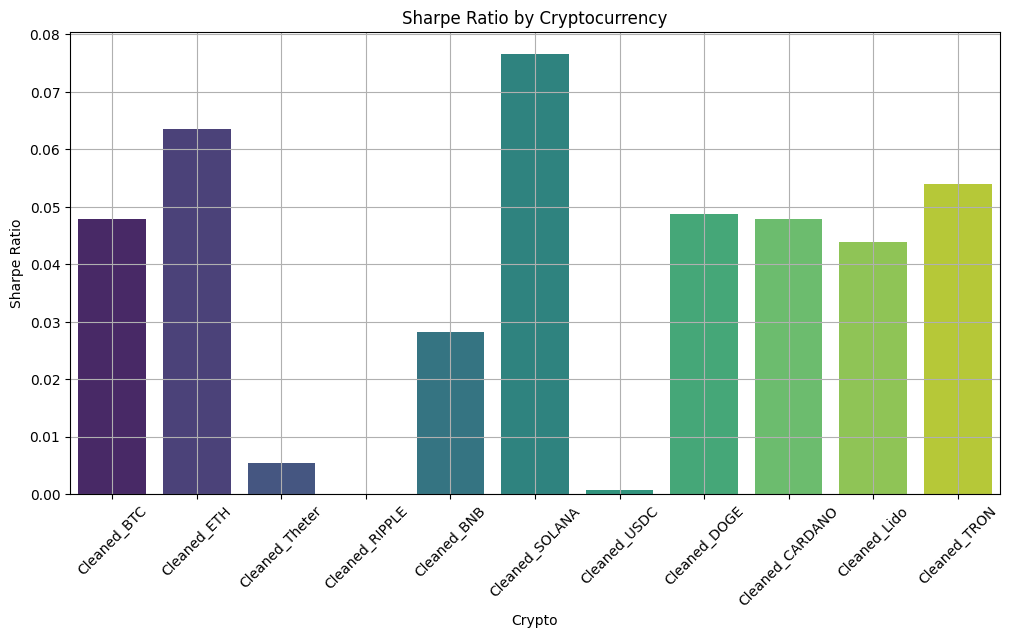

✅ Portfolio Metrics (Cleaned_TRON, Cleaned_ETH):
Mean Daily Return: 0.00283
Volatility: 0.05061
Sharpe Ratio: 0.056
Max Drawdown: -92.10%


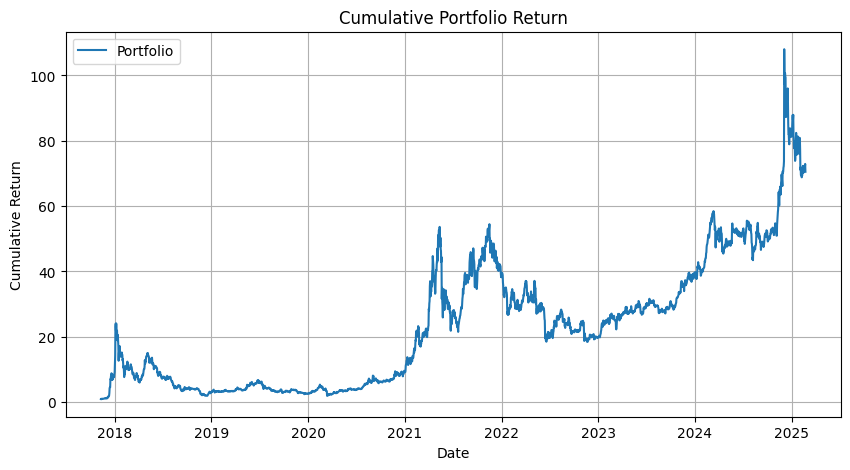

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os


cleaned_file_paths = glob.glob("/content/drive/My Drive/ELEC3612 Crypto Project/Cleaned_Transformed_Data/*.csv")
crypto_data = {}

for path in cleaned_file_paths:
    name = os.path.basename(path).replace(".csv", "")
    df = pd.read_csv(path, parse_dates=["Date"])
    df = df.sort_values("Date")
    df["Return"] = df["Price"].pct_change()
    crypto_data[name] = df

# === Calculate Key Risk Metrics ===
metrics = []

for name, df in crypto_data.items():
    returns = df["Return"].dropna()
    if len(returns) < 2:
        continue

    mean_return = np.mean(returns)
    volatility = np.std(returns)
    sharpe_ratio = mean_return / volatility if volatility != 0 else np.nan
    max_drawdown = ((df["Price"] / df["Price"].cummax()) - 1).min()

    metrics.append({
        "Crypto": name,
        "Mean Daily Return": mean_return,
        "Volatility": volatility,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown
    })

risk_df = pd.DataFrame(metrics).set_index("Crypto")
display(risk_df.sort_values("Sharpe Ratio", ascending=False))

# === Plot Sharpe Ratios ===
plt.figure(figsize=(12, 6))
sns.barplot(data=risk_df.reset_index(), x="Crypto", y="Sharpe Ratio", palette="viridis")
plt.title("Sharpe Ratio by Cryptocurrency")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# === Portfolio Simulation ===
selected = ["Cleaned_TRON", "Cleaned_ETH"]
valid_selected = [coin for coin in selected if coin in crypto_data]

if len(valid_selected) < 2:
    print("❌ Not enough valid coins for portfolio simulation. Please check 'selected' list.")
else:
    returns_df = pd.DataFrame()

    for coin in valid_selected:
        df = crypto_data[coin].copy()
        df = df.set_index("Date")[["Return"]]
        df.rename(columns={"Return": coin}, inplace=True)
        returns_df = pd.concat([returns_df, df], axis=1)

    returns_df = returns_df.dropna()

    if returns_df.empty:
        print("❌ Combined returns dataframe is empty. Please check data alignment.")
    else:
        weights = np.array([1 / len(valid_selected)] * len(valid_selected))

        # === Portfolio metrics
        portfolio_returns = returns_df @ weights
        cumulative_returns = (1 + portfolio_returns).cumprod()

        portfolio_mean = portfolio_returns.mean()
        portfolio_volatility = portfolio_returns.std()
        portfolio_sharpe = portfolio_mean / portfolio_volatility
        portfolio_max_dd = ((cumulative_returns / cumulative_returns.cummax()) - 1).min()

        print(f"✅ Portfolio Metrics ({', '.join(valid_selected)}):")
        print(f"Mean Daily Return: {portfolio_mean:.5f}")
        print(f"Volatility: {portfolio_volatility:.5f}")
        print(f"Sharpe Ratio: {portfolio_sharpe:.3f}")
        print(f"Max Drawdown: {portfolio_max_dd:.2%}")

        # === Plot Portfolio Cumulative Return
        plt.figure(figsize=(10, 5))
        plt.plot(cumulative_returns, label="Portfolio")
        plt.title("Cumulative Portfolio Return")
        plt.xlabel("Date")
        plt.ylabel("Cumulative Return")
        plt.grid(True)
        plt.legend()
        plt.show()
